# PROJET DE MACHINE LEARNING : AMADEUS

L'objectif de ce projet est de mettre en place un modèle de Machine Learning permettant de prédire un Burn_out

### A- IMPORTATION DES PACKAGES ET MODULES 

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

### B- IMPORTATION DES DONNEES 

In [2]:
dataset = pd.read_csv("AMADEUS.csv")
dataset.head()

,Séquentiel,SID,Heure de complétion,1statutactuel,Profession category,MEDIDEASCADRE,STATUTPRO4CAT,MEDIDEvsASCADRE,MEDECIN_ALL,INTERNE,...,PSQI_QUALITE_CONTINU,PSQI_MAUVAISE_QUALITE_BIN,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?",HYPNOTIQUES,"126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?",SOMNOLENCE_MOD_SEVERE,MOTIVATION_DEFICIT_MOD_SEVERE+II4,128DIFF_FINANCE,129REMUNERATION_JUSTE_VALEUR
0,26,8424666,4/26/21 16:39,Médecin : PH titulaire,Physician,1,Physician,1.0,1,0,...,2,1,0,0,0,0,0,0,NaN,NaN
1,27,8437258,4/27/21 15:00,Infirmier Diplômé d'Etat,Nurse,1,Nurse,1.0,0,0,...,2,1,2,1,1,1,0,0,NaN,NaN
2,28,8437467,4/27/21 15:11,Médecin : PH titulaire,Physician,1,Physician,1.0,1,0,...,2,1,3,1,0,2,0,1,NaN,NaN
3,29,8437725,4/27/21 15:23,Médecin : Interne en médecine (incluant intern...,Physician,1,Physician,1.0,1,1,...,2,1,1,1,1,1,0,0,NaN,NaN
4,30,8438934,4/27/21 16:24,Infirmier Diplômé d'Etat,Nurse,1,Nurse,1.0,0,0,...,2,1,1,1,1,2,0,1,NaN,NaN


###  C- DATA ENGINIEERING

In [3]:
# Affichage des colonnes ou des variables de mon dataset

print(dataset.columns.tolist())

['Séquentiel', 'SID', 'Heure de complétion', '1statutactuel', 'Profession category', 'MEDIDEASCADRE', 'STATUTPRO4CAT', 'MEDIDEvsASCADRE', 'MEDECIN_ALL', 'INTERNE', 'IDE', 'AS', 'CADRE_IDE', 'CADRE_SUP', 'CADRE_IDEETSUP', 'CADRE_CADRESUP_ALL', 'PHARMACIEN', 'PSYCHO', 'SAGEFEMME', 'KINE', 'ERGO', 'DIRECTEURSOINS', 'MED_CDD_VS_CDI_PUBLIC', 'MED_PUBLIC_VS_PRIVE', 'IADE_IBODE_VS_AUTREIDE', '2. Quel âge avez-vous ?', '3. Votre sexe biologique :', 'SEX_M', '4. Votre genre psychique:', 'NON_BINAIRE', 'GENRE_M', 'taille', 'poids', 'IMC', 'SURPOIDS_OBESITE', 'OBESITE', 'codepostal', 'secteur_categories', 'PUBLICETEPBNL_VS_PRIVE', 'PUBLIC_VS_PRIVE_ET_EPBNL', '9. Exercez-vous dans un établissement', 'SANITAIRE_VS_MEDICOSOCIAL', 'ANCIENNETE', 'ANCIENNETE_1AN_OU_MOINS', '11conjoint_domicile', '12enfants_nb', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie inf

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10325 entries, 0 to 10324
Columns: 237 entries, Séquentiel to 129REMUNERATION_JUSTE_VALEUR
dtypes: float64(16), int64(206), object(15)
memory usage: 18.7+ MB


In [5]:
dataset.isnull().sum()

Séquentiel                                                                                                                                   0
SID                                                                                                                                          0
Heure de complétion                                                                                                                          0
1statutactuel                                                                                                                                0
Profession category                                                                                                                          0
                                                                                                                                          ... 
127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?       0

In [6]:
dataset.shape

(10325, 237)

##### Commentaire : 
Mon dataset compte 10325 individus et 237 variables.
Mais nous n'utiliserons pas toutes les 237 variables donc nous allons subseter les variables qui nous intèrèsse

#### 1- CHOIX DE MES VARIABLES 

In [7]:
df = dataset[['2. Quel âge avez-vous ?','SEX_M','IMC','PUBLIC_VS_PRIVE_ET_EPBNL','ANCIENNETE','11conjoint_domicile','ENFANT_BIN',
'13reconfort_entourage','14proche_aidant','service_COVID19','Anatomopathologie','Anesthésie','Biologie médicale',
'Chirurgie tête et cou','Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 
'Chirurgie Maxillo-faciale','Chirurgie: Neurochirurgie','Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 
'Chirurgie thoracique et cardiologique','Chirurgie Viscérale et Digestive','Chirurgie Urologique', 'Chirurgie Vasculaire',
'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 
'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 
'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale','Médecine : Infectiologie', 'Médecine Interne',
'Médecine: Néphrologie', 'Médecine : Neurologie','Médecine Nucléaire', 'Médecine : Ophtalmologie', 'Médecine : Oncologie', 
'Médecine : Oto-Rhino-Laryngologie ( ORL)', 'Médecine : Pédiatrie (Néonatologie)', 'Médecine : Pédiatrie (hors néonatologie)', 
'Médecine Physique et de Réadaptation', 'Médecine : Pneumologie', 'Médecine: Radiologie', 'Médecine : Rhumatologie', 'Médecine : Soins palliatifs',
'Médecine : Stomatologie', 'Médecine du travail', 'Médecine: Urgences', 'Médecine: Urgences préhospitalières (SAMU)', 'Médecine Vasculaire / angiologie', 
'Psychiatrie adulte','Psychiatrie: pédopsychiatrie et enfance inadaptée', 'Soins critiques : Réanimation', 'Soins critiques : soins continus ou soins intensifs polyvalents', 'Soins critiques : soins intensifs', 
'Santé Publique', "Service d'Information Médicale", 'Service qualité et gestion des risques', '16TEMPS_COMPLET', '17POSTE_DE_NUIT', 
'18GARDES_NUIT', '19HORAIRES_CONSTANTS', '21PLANNING_2SEM_CONNU', '22DEPASSEMENT_HORAIRE_PREVU_FQC', '23WKEND_W_MOIS_NB', '24ARRET_NB_J_LASTYEAR', 
'25MALADIE_CHRONIQUE', '26ALD','KARASEK_QUANTITE_RAPIDITE', 'KARASEK_COMPLEXITE_INTENSITE','KARASEK_MORCELLEMENT_IMPREVISIBILITE',
'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE', 'KARASEK_DVLPT_COMPETENCE', 
'KARASEK_SOUTIEN_PRO_SUPERIEURS', 'KARASEK_SOUTIEN_PRO_COLLEGUES', 'KARASEK_SOUTIEN_EMO_SUPERIEURS', 'KARASEK_SOUTIEN_EM0_COLLEGUES', 
 '75CRAINTE_ERREUR_FQC', '76HARCELEMENT_MORAL','78HARCELEMENT_SEXUEL','80SOBD','81EDM_LIFETIME_NB','82ATD', '83ANXIO', '84PSYCHOSTIM',
 '85SUIVI_PSY4', '86SUIVI_PSYCHO', '87NB_CIG', '88CAFE_TASSES','DETA_CUTOFF2','METS_MIN_SEMAINE','CESD1', 'CESD2', 'CESD3', 'CESD5', 'CESD6', 'CESD7',
'CESD9', 'CESD10', 'CESD11', 'CESD13', 'CESD14', 'CESD15','CESD17', 'CESD18', 'CESD19', 'CESD20', 'CESD4', 'CESD8', 'CESD12', 'CESD16', 
'120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?', 
'122.DUREE_SOMM_CONTINU','PSQI_TBSOMMEIL_CONTINU',  'PSQI_QUALITE_CONTINU', 
'125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?',
'126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?',
'127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?','BURNOUT_BIN']]
# un moyen d'automatiser ceci

In [8]:
df

,2. Quel âge avez-vous ?,SEX_M,IMC,PUBLIC_VS_PRIVE_ET_EPBNL,ANCIENNETE,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,...,CESD12,CESD16,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?",122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?","126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?",BURNOUT_BIN
0,39,1,"24,69135802",1,"10,00",1,0,1,0,0,...,0,0,5.0,"6,5",10,2,0,0,0,0
1,26,0,"21,75546853",1,"4,00",0,0,1,0,0,...,0,2,120.0,5,8,2,2,1,1,0
2,35,0,"16,32653061",1,"6,00",0,0,1,0,0,...,3,3,20.0,6,11,2,3,0,2,0
3,28,0,"23,87511478",1,"4,00",0,0,1,0,0,...,3,3,30.0,6,6,2,1,1,1,0
4,31,0,"18,96192742",1,"6,00",1,0,0,0,0,...,2,3,15.0,7,14,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,58,0,"24,45606342",1,"30,00",0,1,1,0,0,...,0,0,15.0,6,9,2,0,3,1,0
10321,40,0,"21,73650525",0,"7,00",0,1,1,1,0,...,0,0,10.0,"6,5",0,1,0,0,0,0
10322,30,0,25,1,"3,00",0,0,1,0,0,...,0,1,15.0,7,13,1,1,2,1,1
10323,39,0,"27,63605442",1,"5,00",1,1,1,0,0,...,0,0,5.0,"7,5",7,1,0,0,1,0


In [9]:
df.shape

(10325, 129)

Après le choix de nos variables nous voyons que nous avons fait 129 variables mais toujours avec 10325 individus

#### 2-  Renommer certaines variables à cause de leurs longueurs 

In [10]:
df1 = df.copy()  # Create copy of DataFrame

In [11]:
df1 = df1.rename(columns = {"2. Quel âge avez-vous ?" : "Age","SEX_M": "Sexe","120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?": 
"Q120", "125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?": "Q125",
"126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?": "Q126", 
"127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?": "Q127","BURNOUT_BIN":"Y"})  # Using rename()

In [12]:
df1

,Age,Sexe,IMC,PUBLIC_VS_PRIVE_ET_EPBNL,ANCIENNETE,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,...,CESD12,CESD16,Q120,122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,Q125,Q126,Q127,Y
0,39,1,"24,69135802",1,"10,00",1,0,1,0,0,...,0,0,5.0,"6,5",10,2,0,0,0,0
1,26,0,"21,75546853",1,"4,00",0,0,1,0,0,...,0,2,120.0,5,8,2,2,1,1,0
2,35,0,"16,32653061",1,"6,00",0,0,1,0,0,...,3,3,20.0,6,11,2,3,0,2,0
3,28,0,"23,87511478",1,"4,00",0,0,1,0,0,...,3,3,30.0,6,6,2,1,1,1,0
4,31,0,"18,96192742",1,"6,00",1,0,0,0,0,...,2,3,15.0,7,14,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,58,0,"24,45606342",1,"30,00",0,1,1,0,0,...,0,0,15.0,6,9,2,0,3,1,0
10321,40,0,"21,73650525",0,"7,00",0,1,1,1,0,...,0,0,10.0,"6,5",0,1,0,0,0,0
10322,30,0,25,1,"3,00",0,0,1,0,0,...,0,1,15.0,7,13,1,1,2,1,1
10323,39,0,"27,63605442",1,"5,00",1,1,1,0,0,...,0,0,5.0,"7,5",7,1,0,0,1,0


# SIGNIFICATION DE CHAQUE VARIABLE 

In [13]:
df1.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtyp

##### Commentaire : 
Nous avons vérifié le type de nos variables afin de nous assurer qu'ils sont tous des numériques ou des floatés mais ci-dessus nous voyons qu'il y a 4 variables qui sont des objets donc nous allons changer leur type

In [14]:
df.select_dtypes(object).columns

Index(['IMC', 'ANCIENNETE', 'METS_MIN_SEMAINE', '122.DUREE_SOMM_CONTINU'], dtype='object')

### 1ère variable :     IMC

In [15]:
df1['IMC']

0        24,69135802
1        21,75546853
2        16,32653061
3        23,87511478
4        18,96192742
            ...     
10320    24,45606342
10321    21,73650525
10322             25
10323    27,63605442
10324    18,16620425
Name: IMC, Length: 10325, dtype: object

In [16]:
df1['IMC']=df1['IMC'].apply(lambda x: str(x).replace(",", "."))
df1['IMC']=df1['IMC'].astype(float)

In [17]:
df1['IMC']

0        24.691358
1        21.755469
2        16.326531
3        23.875115
4        18.961927
           ...    
10320    24.456063
10321    21.736505
10322    25.000000
10323    27.636054
10324    18.166204
Name: IMC, Length: 10325, dtype: float64

### 2éme variable :  ANCIENNETE

In [18]:
df1['ANCIENNETE']

0        10,00
1         4,00
2         6,00
3         4,00
4         6,00
         ...  
10320    30,00
10321     7,00
10322     3,00
10323     5,00
10324    21,00
Name: ANCIENNETE, Length: 10325, dtype: object

In [19]:
df1['ANCIENNETE']=df1['ANCIENNETE'].apply(lambda x: str(x).replace(",", "."))
df1['ANCIENNETE']=df1['ANCIENNETE'].astype(float)

In [20]:
df1['ANCIENNETE']

0        10.0
1         4.0
2         6.0
3         4.0
4         6.0
         ... 
10320    30.0
10321     7.0
10322     3.0
10323     5.0
10324    21.0
Name: ANCIENNETE, Length: 10325, dtype: float64

### 3éme variable :  METS_MIN_SEMAINE

In [21]:
df1['METS_MIN_SEMAINE']

0           960
1           891
2        2212,5
3         586,5
4          3660
          ...  
10320      7572
10321     817,5
10322    2209,5
10323      1074
10324       153
Name: METS_MIN_SEMAINE, Length: 10325, dtype: object

In [22]:
df1['METS_MIN_SEMAINE']=df1['METS_MIN_SEMAINE'].apply(lambda x: str(x).replace(",", "."))
df1['METS_MIN_SEMAINE']=df1['METS_MIN_SEMAINE'].astype(float)

In [23]:
df1['METS_MIN_SEMAINE']

0         960.0
1         891.0
2        2212.5
3         586.5
4        3660.0
          ...  
10320    7572.0
10321     817.5
10322    2209.5
10323    1074.0
10324     153.0
Name: METS_MIN_SEMAINE, Length: 10325, dtype: float64

### 4éme variable :  122.DUREE_SOMM_CONTINU

In [24]:
df1['122.DUREE_SOMM_CONTINU']

0        6,5
1          5
2          6
3          6
4          7
        ... 
10320      6
10321    6,5
10322      7
10323    7,5
10324      6
Name: 122.DUREE_SOMM_CONTINU, Length: 10325, dtype: object

In [25]:
df1['122.DUREE_SOMM_CONTINU']=df1['122.DUREE_SOMM_CONTINU'].apply(lambda x: str(x).replace(",", "."))
df1['122.DUREE_SOMM_CONTINU']=df1['122.DUREE_SOMM_CONTINU'].astype(float)

In [26]:
df1['122.DUREE_SOMM_CONTINU']

0        6.5
1        5.0
2        6.0
3        6.0
4        7.0
        ... 
10320    6.0
10321    6.5
10322    7.0
10323    7.5
10324    6.0
Name: 122.DUREE_SOMM_CONTINU, Length: 10325, dtype: float64

In [27]:
df1.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('in

In [28]:
print(df1.columns.tolist())

['Age', 'Sexe', 'IMC', 'PUBLIC_VS_PRIVE_ET_EPBNL', 'ANCIENNETE', '11conjoint_domicile', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 'Chirurgie Maxillo-faciale', 'Chirurgie: Neurochirurgie', 'Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 'Chirurgie thoracique et cardiologique', 'Chirurgie Viscérale et Digestive', 'Chirurgie Urologique', 'Chirurgie Vasculaire', 'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale', 'Médecine : Infectiologie', 'Médecine Interne', 'Médecine: 

##### Commentaire : 
Donc nous avons toutes nos variables qui sont des variables quantitatives 

## 3- Regard sur la distribution de certaines variables 

In [29]:
# [O] pour les femmes 
# [1] pour les hommes 

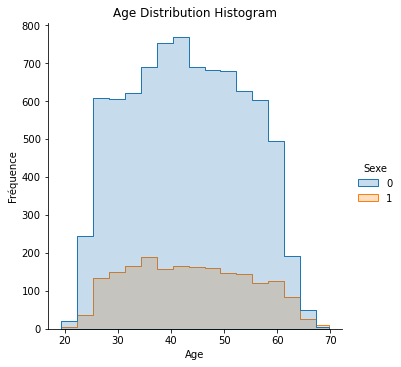

In [30]:
sns.displot(df1, x="Age",binwidth=3,shrink=.8,hue="Sexe",element="step")
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title("Age Distribution Histogram")
plt.show()

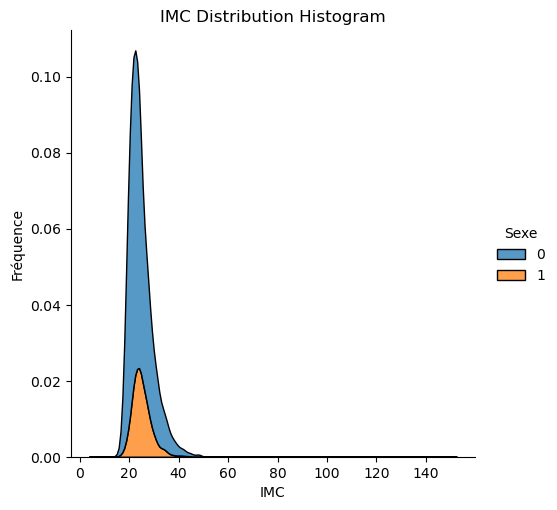

In [31]:
sns.displot(df1, x="IMC", hue="Sexe", kind="kde", multiple="stack")
plt.xlabel("IMC")
plt.ylabel("Fréquence")
plt.title("IMC Distribution Histogram")
plt.show()

<AxesSubplot:title={'center':'Sexe'}, ylabel='Frequency'>

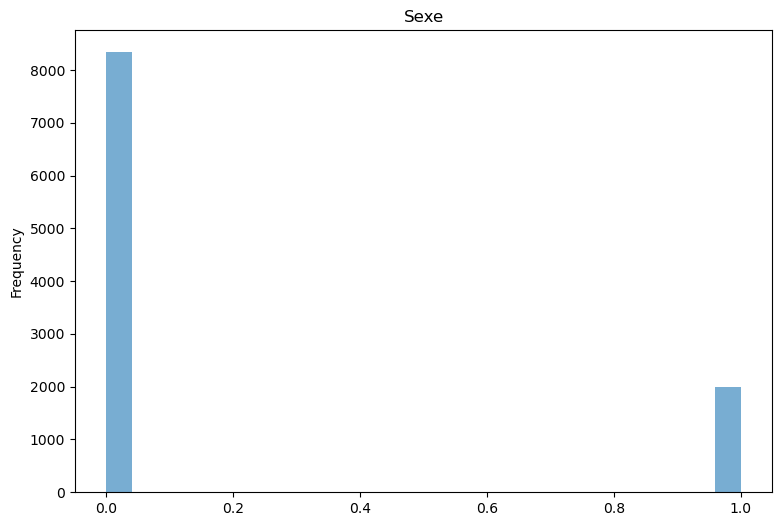

In [32]:
df1['Sexe'].plot(kind='hist', bins=25, alpha=0.6, figsize=(9,6),title='Sexe')

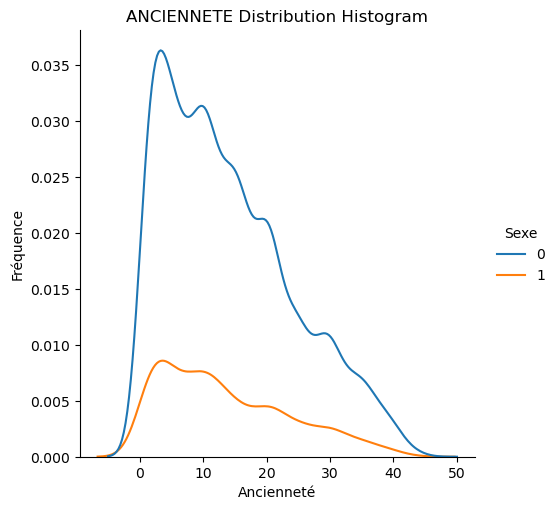

In [33]:
sns.displot(df1, x="ANCIENNETE", hue="Sexe", kind="kde")
plt.xlabel("Ancienneté")
plt.ylabel("Fréquence")
plt.title("ANCIENNETE Distribution Histogram")
plt.show()

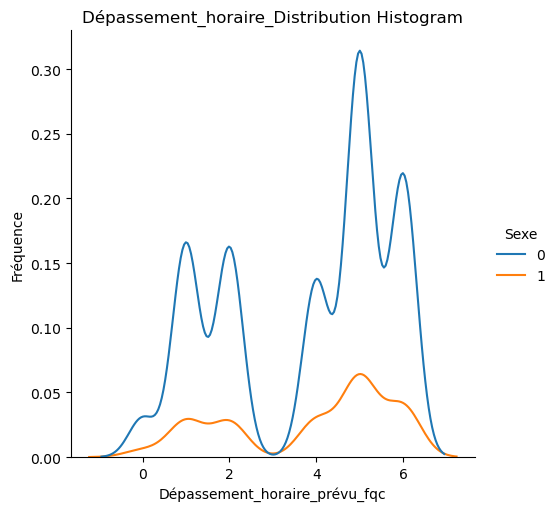

In [34]:
sns.displot(df1, x='22DEPASSEMENT_HORAIRE_PREVU_FQC', hue="Sexe", kind="kde")
plt.xlabel("Dépassement_horaire_prévu_fqc")
plt.ylabel("Fréquence")
plt.title("Dépassement_horaire_Distribution Histogram")
plt.show()

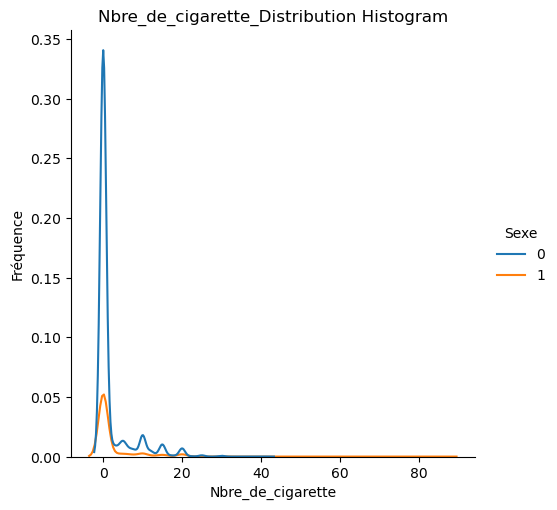

In [35]:
sns.displot(df1, x='87NB_CIG', hue="Sexe", kind="kde")
plt.xlabel("Nbre_de_cigarette")
plt.ylabel("Fréquence")
plt.title("Nbre_de_cigarette_Distribution Histogram")
plt.show()

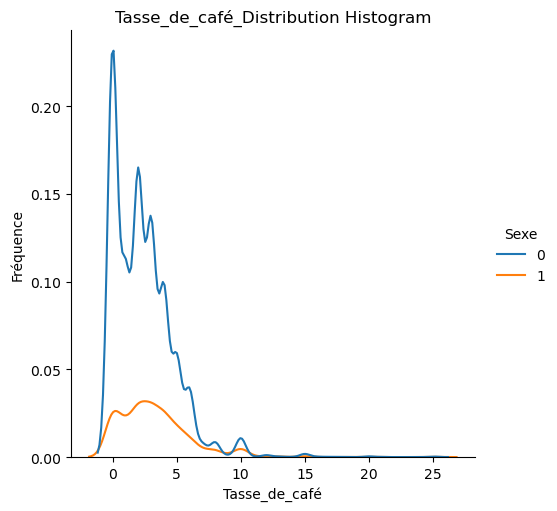

In [36]:
sns.displot(df1, x='88CAFE_TASSES', hue="Sexe", kind="kde")
plt.xlabel("Tasse_de_café")
plt.ylabel("Fréquence")
plt.title("Tasse_de_café_Distribution Histogram")
plt.show()

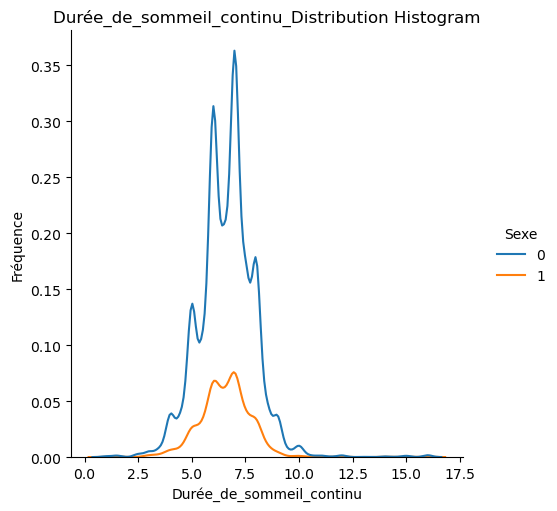

In [37]:
sns.displot(df1, x='122.DUREE_SOMM_CONTINU', hue="Sexe", kind="kde")
plt.xlabel("Durée_de_sommeil_continu")
plt.ylabel("Fréquence")
plt.title("Durée_de_sommeil_continu_Distribution Histogram")
plt.show()

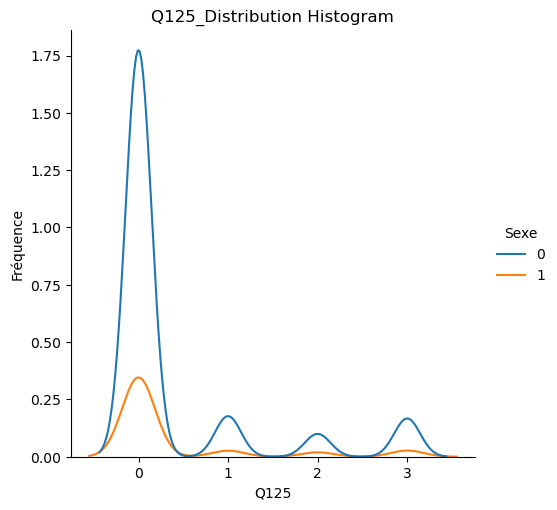

In [38]:
sns.displot(df1, x='Q125', hue="Sexe", kind="kde")
plt.xlabel("Q125")
plt.ylabel("Fréquence")
plt.title("Q125_Distribution Histogram")
plt.show()
#125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?'

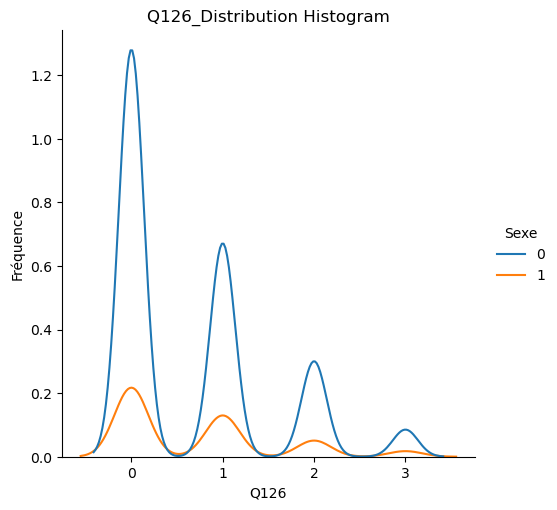

In [39]:
sns.displot(df1, x='Q126', hue="Sexe", kind="kde")
plt.xlabel("Q126")
plt.ylabel("Fréquence")
plt.title("Q126_Distribution Histogram")
plt.show()
#'126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?'

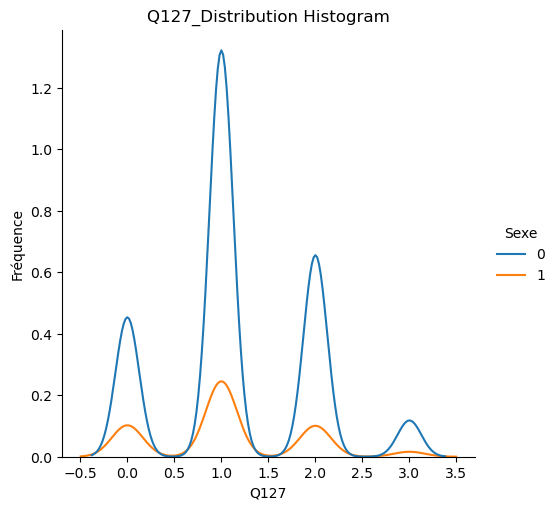

In [40]:
sns.displot(df1, x='Q127', hue="Sexe", kind="kde")
plt.xlabel("Q127")
plt.ylabel("Fréquence")
plt.title("Q127_Distribution Histogram")
plt.show()
#127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?'

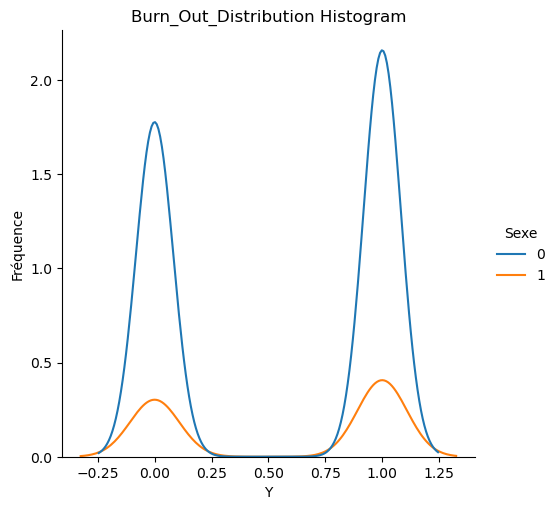

In [41]:
sns.displot(df1, x='Y', hue="Sexe", kind="kde")
plt.xlabel("Y")
plt.ylabel("Fréquence")
plt.title("Burn_Out_Distribution Histogram")
plt.show()


#### 3-  Gestion des données manquantes

In [42]:
df1.isnull().sum()[df1.isnull().sum()>0]

18GARDES_NUIT             118
Q120                        4
122.DUREE_SOMM_CONTINU    140
dtype: int64

##### Commentaire : 
Nous avons 3 variables dans notre dataframe qui ont respectivement 118, 4 et 140 données manquantes

In [43]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    #display (missing_data[(percent>0)])
    return missing_data[(percent>0)]

In [44]:
missing_values(df1).T
#le T c'est pour transposer la table 

,122.DUREE_SOMM_CONTINU,18GARDES_NUIT,Q120
Total,140.000000,118.000000,4.000000
Pourcentage,0.013559,0.011429,0.000387


### Machine Learning Superviséé

### 1ère Partie  : Data_préprocessing

#### Imputation par la moyenne

In [45]:
# Etant donné que j'ai des données manquantes dans mon dataframe je les remplace par la moyenne de la variable concernée 

In [46]:
df1["122.DUREE_SOMM_CONTINU"].mean()

6.616789396170839

In [47]:
df1.fillna(df1.mean(),inplace=True)

In [48]:
missing_values(df1).T
#le T c'est pour transposer la table 

""
Total
Pourcentage


In [49]:
df1.select_dtypes(object).columns

Index([], dtype='object')

In [50]:
# 1) Créer une matrice des variables indépendantes et le vecteur de la variable dépendante.
# X est la matrice et Y est le vecteur
# PS: Astuce : Très souvent la dernière colonne est la colonne dépendante le y à prédire
# La matrice des variables indépendantes est aussi appeelée matrice de features

In [51]:
df1

,Age,Sexe,IMC,PUBLIC_VS_PRIVE_ET_EPBNL,ANCIENNETE,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,...,CESD12,CESD16,Q120,122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,Q125,Q126,Q127,Y
0,39,1,24.691358,1,10.0,1,0,1,0,0,...,0,0,5.0,6.5,10,2,0,0,0,0
1,26,0,21.755469,1,4.0,0,0,1,0,0,...,0,2,120.0,5.0,8,2,2,1,1,0
2,35,0,16.326531,1,6.0,0,0,1,0,0,...,3,3,20.0,6.0,11,2,3,0,2,0
3,28,0,23.875115,1,4.0,0,0,1,0,0,...,3,3,30.0,6.0,6,2,1,1,1,0
4,31,0,18.961927,1,6.0,1,0,0,0,0,...,2,3,15.0,7.0,14,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,58,0,24.456063,1,30.0,0,1,1,0,0,...,0,0,15.0,6.0,9,2,0,3,1,0
10321,40,0,21.736505,0,7.0,0,1,1,1,0,...,0,0,10.0,6.5,0,1,0,0,0,0
10322,30,0,25.000000,1,3.0,0,0,1,0,0,...,0,1,15.0,7.0,13,1,1,2,1,1
10323,39,0,27.636054,1,5.0,1,1,1,0,0,...,0,0,5.0,7.5,7,1,0,0,1,0


In [52]:
print(df1.columns.tolist())

['Age', 'Sexe', 'IMC', 'PUBLIC_VS_PRIVE_ET_EPBNL', 'ANCIENNETE', '11conjoint_domicile', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 'Chirurgie Maxillo-faciale', 'Chirurgie: Neurochirurgie', 'Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 'Chirurgie thoracique et cardiologique', 'Chirurgie Viscérale et Digestive', 'Chirurgie Urologique', 'Chirurgie Vasculaire', 'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale', 'Médecine : Infectiologie', 'Médecine Interne', 'Médecine: 

# Gestion des variables binaires et non binaires 

In [53]:
binary_vars = []
non_binary_vars = []
for col in df1.columns:
    if df1[col].nunique() == 2:
        binary_vars.append(col)
    else:
        non_binary_vars.append(col)

In [54]:
# Afficher les colonnes binaires
print('Colonnes binaires :', binary_vars)

Colonnes binaires : ['Sexe', 'PUBLIC_VS_PRIVE_ET_EPBNL', '11conjoint_domicile', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 'Chirurgie Maxillo-faciale', 'Chirurgie: Neurochirurgie', 'Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 'Chirurgie thoracique et cardiologique', 'Chirurgie Viscérale et Digestive', 'Chirurgie Urologique', 'Chirurgie Vasculaire', 'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale', 'Médecine : Infectiologie', 'Médecine Interne', 'Médecine: Néphrolo

In [55]:
# Afficher les colonnes non_binaires
print('Colonnes non binaires :', non_binary_vars)

Colonnes non binaires : ['Age', 'IMC', 'ANCIENNETE', '18GARDES_NUIT', '22DEPASSEMENT_HORAIRE_PREVU_FQC', '23WKEND_W_MOIS_NB', '24ARRET_NB_J_LASTYEAR', 'KARASEK_QUANTITE_RAPIDITE', 'KARASEK_COMPLEXITE_INTENSITE', 'KARASEK_MORCELLEMENT_IMPREVISIBILITE', 'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE', 'KARASEK_DVLPT_COMPETENCE', 'KARASEK_SOUTIEN_PRO_SUPERIEURS', 'KARASEK_SOUTIEN_PRO_COLLEGUES', 'KARASEK_SOUTIEN_EMO_SUPERIEURS', 'KARASEK_SOUTIEN_EM0_COLLEGUES', '75CRAINTE_ERREUR_FQC', '81EDM_LIFETIME_NB', '87NB_CIG', '88CAFE_TASSES', 'METS_MIN_SEMAINE', 'CESD1', 'CESD2', 'CESD3', 'CESD5', 'CESD6', 'CESD7', 'CESD9', 'CESD10', 'CESD11', 'CESD13', 'CESD14', 'CESD15', 'CESD17', 'CESD18', 'CESD19', 'CESD20', 'CESD4', 'CESD8', 'CESD12', 'CESD16', 'Q120', '122.DUREE_SOMM_CONTINU', 'PSQI_TBSOMMEIL_CONTINU', 'PSQI_QUALITE_CONTINU', 'Q125', 'Q126', 'Q127']


In [56]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

In [57]:
# Standardisation des variables non binaires
scaler1 = StandardScaler()
df1[non_binary_vars] = scaler1.fit_transform(df1[non_binary_vars])

In [58]:
# Concaténation des variables binaires et non binaires
df2 = pd.concat([df1[binary_vars], df1[non_binary_vars]], axis=1)

In [59]:
df2

,Sexe,PUBLIC_VS_PRIVE_ET_EPBNL,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,Anatomopathologie,Anesthésie,Biologie médicale,...,CESD8,CESD12,CESD16,Q120,122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,Q125,Q126,Q127
0,1,1,1,0,1,0,0,0,0,0,...,1.445208,-0.938764,-1.065129,-0.516179,-0.091942,0.357193,0.756248,-0.441040,-0.785521,-1.500656
1,0,1,0,0,1,0,0,0,0,0,...,-1.122199,-0.938764,0.701247,2.044576,-1.272809,-0.078048,0.756248,1.844401,0.405799,-0.197411
2,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,-0.182168,-0.485564,0.574813,0.756248,2.987122,-0.785521,1.105833
3,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,0.040507,-0.485564,-0.513289,0.756248,0.701680,0.405799,-0.197411
4,0,1,1,0,0,0,0,0,0,0,...,1.445208,0.997267,1.584435,-0.293505,0.301681,1.227675,0.756248,0.701680,0.405799,1.105833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,0,1,0,1,1,0,0,0,0,0,...,0.589405,-0.938764,-1.065129,-0.293505,-0.485564,0.139572,0.756248,-0.441040,2.788438,-0.197411
10321,0,0,0,1,1,1,0,0,1,0,...,-1.122199,-0.938764,-1.065129,-0.404842,-0.091942,-1.819013,-0.542099,-0.441040,-0.785521,-1.500656
10322,0,1,0,0,1,0,0,0,0,0,...,-0.266397,-0.938764,-0.181941,-0.293505,0.301681,1.010054,-0.542099,0.701680,1.597118,-0.197411
10323,0,1,1,1,1,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,-0.516179,0.695303,-0.295669,-0.542099,-0.441040,-0.785521,-0.197411


In [60]:
print(df2[non_binary_vars].describe())

                Age           IMC    ANCIENNETE  18GARDES_NUIT  \
count  1.032500e+04  1.032500e+04  1.032500e+04   1.032500e+04   
mean  -4.835841e-16 -5.950580e-17 -1.637001e-16   9.251679e-16   
std    1.000048e+00  1.000048e+00  1.000048e+00   1.000048e+00   
min   -2.147470e+00 -3.627698e+00 -1.373875e+00  -6.559551e-01   
25%   -8.569756e-01 -6.548159e-01 -8.812349e-01  -6.559551e-01   
50%   -2.737223e-02 -2.065375e-01 -1.915382e-01  -6.559551e-01   
75%    8.022312e-01  4.417609e-01  5.966867e-01   1.542119e+00   
max    2.553616e+00  2.475882e+01  3.059889e+00   1.542119e+00   

       22DEPASSEMENT_HORAIRE_PREVU_FQC  23WKEND_W_MOIS_NB  \
count                     1.032500e+04       1.032500e+04   
mean                      6.281981e-16      -8.221538e-16   
std                       1.000048e+00       1.000048e+00   
min                      -2.004674e+00      -9.605314e-01   
25%                      -9.572178e-01      -9.605314e-01   
50%                       6.139667e-01 

In [61]:
df2['Y']

0        0
1        0
2        0
3        0
4        0
        ..
10320    0
10321    0
10322    1
10323    0
10324    0
Name: Y, Length: 10325, dtype: int64

In [62]:
# 1) Créer une matrice des variables indépendantes et le vecteur de la variable dépendante.
# X est la matrice et Y est le vecteur
# PS: Astuce : Très souvent la dernière colonne est la colonne dépendante le y à prédire
# La matrice des variables indépendantes est aussi appeelée matrice de featuresµ

X = df2.drop('Y', axis=1)  # Supprimer la colonne "target" de la matrice X
Y = df2['Y']              # Sélectionner uniquement la colonne "target" pour Y

# Diviser les données en 

In [63]:
X

,Sexe,PUBLIC_VS_PRIVE_ET_EPBNL,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,Anatomopathologie,Anesthésie,Biologie médicale,...,CESD8,CESD12,CESD16,Q120,122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,Q125,Q126,Q127
0,1,1,1,0,1,0,0,0,0,0,...,1.445208,-0.938764,-1.065129,-0.516179,-0.091942,0.357193,0.756248,-0.441040,-0.785521,-1.500656
1,0,1,0,0,1,0,0,0,0,0,...,-1.122199,-0.938764,0.701247,2.044576,-1.272809,-0.078048,0.756248,1.844401,0.405799,-0.197411
2,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,-0.182168,-0.485564,0.574813,0.756248,2.987122,-0.785521,1.105833
3,0,1,0,0,1,0,0,0,0,0,...,1.445208,1.965283,1.584435,0.040507,-0.485564,-0.513289,0.756248,0.701680,0.405799,-0.197411
4,0,1,1,0,0,0,0,0,0,0,...,1.445208,0.997267,1.584435,-0.293505,0.301681,1.227675,0.756248,0.701680,0.405799,1.105833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,0,1,0,1,1,0,0,0,0,0,...,0.589405,-0.938764,-1.065129,-0.293505,-0.485564,0.139572,0.756248,-0.441040,2.788438,-0.197411
10321,0,0,0,1,1,1,0,0,1,0,...,-1.122199,-0.938764,-1.065129,-0.404842,-0.091942,-1.819013,-0.542099,-0.441040,-0.785521,-1.500656
10322,0,1,0,0,1,0,0,0,0,0,...,-0.266397,-0.938764,-0.181941,-0.293505,0.301681,1.010054,-0.542099,0.701680,1.597118,-0.197411
10323,0,1,1,1,1,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,-0.516179,0.695303,-0.295669,-0.542099,-0.441040,-0.785521,-0.197411


In [64]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
10320    0
10321    0
10322    1
10323    0
10324    0
Name: Y, Length: 10325, dtype: int64

### e) Séparation du dataset en training_set et en test_set

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)

In [66]:
#Vérifionsla proportion des 1 et des 0 dans mon Y

In [67]:
np.unique(Y,return_counts=True)

(array([0, 1], dtype=int64), array([4613, 5712], dtype=int64))

In [68]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

      Sexe  PUBLIC_VS_PRIVE_ET_EPBNL  11conjoint_domicile  ENFANT_BIN  \
5796     1                         1                    1           0   
1065     1                         1                    0           0   
3381     0                         1                    1           1   
4492     0                         1                    1           1   
1425     0                         1                    1           1   
...    ...                       ...                  ...         ...   
9225     0                         1                    1           1   
4859     0                         1                    1           1   
3264     0                         1                    1           1   
9845     0                         1                    1           1   
2732     1                         1                    0           0   

      13reconfort_entourage  14proche_aidant  service_COVID19  \
5796                      0                0              

In [69]:
pd.DataFrame(X_train).head()

,Sexe,PUBLIC_VS_PRIVE_ET_EPBNL,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,Anatomopathologie,Anesthésie,Biologie médicale,...,CESD8,CESD12,CESD16,Q120,122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,Q125,Q126,Q127
5796,1,1,1,0,0,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,-0.182168,-0.091942,-1.601392,-0.542099,-0.441040,-0.785521,-1.500656
1065,1,1,0,0,1,0,0,0,0,0,...,0.589405,0.029251,0.701247,-0.182168,1.088925,1.445296,-0.542099,-0.441040,0.405799,-0.197411
3381,0,1,1,1,1,1,0,0,0,0,...,-0.266397,-0.938764,-1.065129,-0.293505,0.301681,-0.295669,-0.542099,-0.441040,-0.785521,-0.197411
4492,0,1,1,1,1,0,0,0,0,0,...,0.589405,0.997267,1.584435,0.040507,0.695303,1.010054,0.756248,2.987122,0.405799,1.105833
1425,0,1,1,1,1,0,0,0,0,0,...,-1.122199,-0.938764,-1.065129,-0.182168,-0.091942,-0.948531,-0.542099,-0.441040,-0.785521,-0.197411


# TEST DES MODELES

###                           ML SUPERVISE

## Construction du modèle de Regression Logistique : modèle linéaire

La régression logistique est une méthode de classification supervisée en Machine Learning. Elle est utilisée pour prédire une variable cible binaire (par exemple oui/non, vrai/faux, 0/1) en fonction de plusieurs variables explicatives.

Le modèle de régression logistique utilise une fonction logistique pour modéliser la relation entre les variables explicatives et la variable cible. Cette fonction de régression produit une probabilité entre 0 et 1 qui est utilisée pour classer chaque observation dans une des deux catégories possibles.

In [70]:
# Pour cela il faut importer une classe qui s'appelle linear.regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='l1', C=0.1, solver='liblinear',random_state = 0)
classifier.fit(X_train, Y_train)

#Underfitting : MauvaiseApprentissage
#Overfitting :  SurApprentissage


LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')

### LES PARAMETRES



#penalty : Le type de régularisation à utiliser. Les options courantes sont l1, l2, elasticnet et none. Par défaut, la régression logistique utilise une régularisation L2 (également appelée régularisation Ridge) en spécifiant penalty='l2'

#C : L'inverse de la force de régularisation. Une valeur plus élevée de C signifie une régularisation plus faible, ce qui permet au modèle de s'adapter davantage aux données d'entraînement. Par défaut, C=1.0

#solver : L'algorithme utilisé pour optimiser les coefficients du modèle. Les options courantes sont newton-cg, lbfgs, liblinear, sag et saga.

#Le choix de l'algorithme dépend de la taille du jeu de données et des caractéristiques spécifiques du problème de classification. Par défaut, solver='lbfgs'.


### Faire de nouvelles prédictions 

In [71]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [72]:
print(Y_test)
print(Y_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 0 ... 0 1 1]


In [73]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [74]:
with np.printoptions(threshold=np.inf):
    print(Y_pred)

[0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1
 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 

## Matrice de confusion

In [75]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
CM

array([[646, 236],
       [255, 928]], dtype=int64)

<AxesSubplot:>

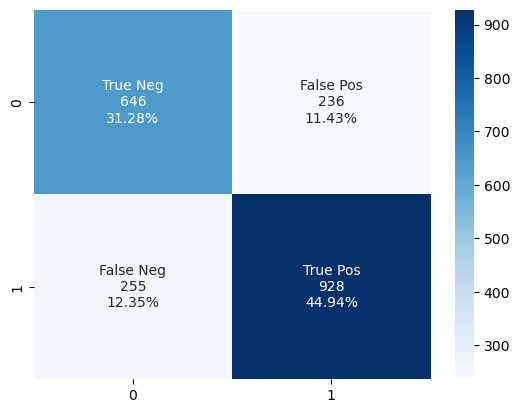

In [76]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM.flatten()/np.sum(CM)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM, annot=labels, fmt='', cmap='Blues')

### INTERPRETATION 

Le modèle de regression logistique a prèdit que sur les 2065 individus : 

1- 646 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 646, et y0 = 646

2- 928 employés ont le burn_out et ceci est exacte (TP) en clair ŷ1 = 928, et y1 = 928

3- 236 ont le burn_out alors qu'ils ne l'ont pas  (FP) en clair ŷ1 = 236, et y0 = 236

4- 255 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 255 , et y1 = 255

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Accuracy_Rate = accuracy_score(Y_test, Y_pred)
Error_rate = 1 - Accuracy_Rate
F1_score_logreg = f1_score(Y_test, Y_pred)

print("Accuracy rate: ", Accuracy_Rate)
print("Error rate: ",Error_rate)
print("F1_score: ",F1_score_logreg)

Accuracy rate:  0.762227602905569
Error rate:  0.237772397094431
F1_score:  0.7907967618236046


l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 76,22% de vrais prédictions

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 23,77% de fausses prédictions

Un F1-score élevé indique une bonne performance globale du modèle, avec une balance entre la précision et le rappel. Un F1-score de 1 indique une précision et un rappel parfaits, tandis qu'un F1-score de 0 indique une performance très faible.
Dans notre cas ici notre F1_score est 0,79

### Courbe roc 

La courbe ROC (Receiver Operating Characteristic) est un graphique du taux de vrais positifs par rapport au taux de faux positifs. Il montre le compromis entre sensibilité et spécificité.

In [78]:
from sklearn import metrics

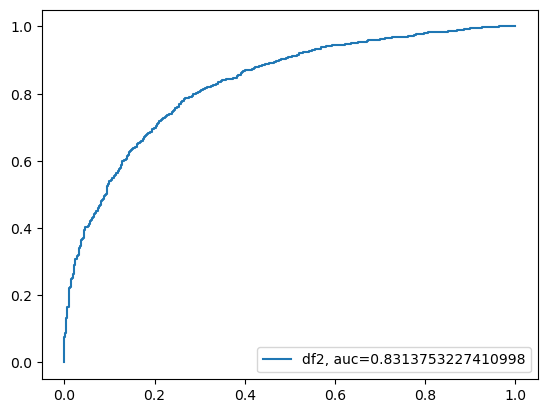

In [79]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [80]:
auc

0.8313753227410998

### INTERPRETATION :

Le score AUC pour ce cas est de 0,83. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.

# Top 20 des variables indépendantes qui sont les plus importantes

In [81]:
# Convertir X en DataFrame Pandas
X_df = pd.DataFrame(X, columns=['2. Quel âge avez-vous ?','SEX_M','IMC','PUBLIC_VS_PRIVE_ET_EPBNL','ANCIENNETE','11conjoint_domicile','ENFANT_BIN',
'13reconfort_entourage','14proche_aidant','service_COVID19','Anatomopathologie','Anesthésie','Biologie médicale',
'Chirurgie tête et cou','Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 
'Chirurgie Maxillo-faciale','Chirurgie: Neurochirurgie','Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 
'Chirurgie thoracique et cardiologique','Chirurgie Viscérale et Digestive','Chirurgie Urologique', 'Chirurgie Vasculaire',
'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 
'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 
'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale','Médecine : Infectiologie', 'Médecine Interne',
'Médecine: Néphrologie', 'Médecine : Neurologie','Médecine Nucléaire', 'Médecine : Ophtalmologie', 'Médecine : Oncologie', 
'Médecine : Oto-Rhino-Laryngologie ( ORL)', 'Médecine : Pédiatrie (Néonatologie)', 'Médecine : Pédiatrie (hors néonatologie)', 
'Médecine Physique et de Réadaptation', 'Médecine : Pneumologie', 'Médecine: Radiologie', 'Médecine : Rhumatologie', 'Médecine : Soins palliatifs',
'Médecine : Stomatologie', 'Médecine du travail', 'Médecine: Urgences', 'Médecine: Urgences préhospitalières (SAMU)', 'Médecine Vasculaire / angiologie', 
'Psychiatrie adulte','Psychiatrie: pédopsychiatrie et enfance inadaptée', 'Soins critiques : Réanimation', 'Soins critiques : soins continus ou soins intensifs polyvalents', 'Soins critiques : soins intensifs', 
'Santé Publique', "Service d'Information Médicale", 'Service qualité et gestion des risques', '16TEMPS_COMPLET', '17POSTE_DE_NUIT', 
'18GARDES_NUIT', '19HORAIRES_CONSTANTS', '21PLANNING_2SEM_CONNU', '22DEPASSEMENT_HORAIRE_PREVU_FQC', '23WKEND_W_MOIS_NB', '24ARRET_NB_J_LASTYEAR', 
'25MALADIE_CHRONIQUE', '26ALD','KARASEK_QUANTITE_RAPIDITE', 'KARASEK_COMPLEXITE_INTENSITE','KARASEK_MORCELLEMENT_IMPREVISIBILITE',
'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE', 'KARASEK_DVLPT_COMPETENCE', 
'KARASEK_SOUTIEN_PRO_SUPERIEURS', 'KARASEK_SOUTIEN_PRO_COLLEGUES', 'KARASEK_SOUTIEN_EMO_SUPERIEURS', 'KARASEK_SOUTIEN_EM0_COLLEGUES', 
 '75CRAINTE_ERREUR_FQC', '76HARCELEMENT_MORAL','78HARCELEMENT_SEXUEL','80SOBD','81EDM_LIFETIME_NB','82ATD', '83ANXIO', '84PSYCHOSTIM',
 '85SUIVI_PSY4', '86SUIVI_PSYCHO', '87NB_CIG', '88CAFE_TASSES','DETA_CUTOFF2','METS_MIN_SEMAINE','CESD1', 'CESD2', 'CESD3', 'CESD5', 'CESD6', 'CESD7',
'CESD9', 'CESD10', 'CESD11', 'CESD13', 'CESD14', 'CESD15','CESD17', 'CESD18', 'CESD19', 'CESD20', 'CESD4', 'CESD8', 'CESD12', 'CESD16', 
'120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?', 
'122.DUREE_SOMM_CONTINU','PSQI_TBSOMMEIL_CONTINU',  'PSQI_QUALITE_CONTINU', 
'125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?',
'126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?',
'127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?'])

In [82]:
# Récupération des coefficients associés à chaque variable indépendante
coef = pd.Series(classifier.coef_[0], index=X_df.columns)

# Tri des variables indépendantes en fonction de leur coefficient
sorted_coef = coef.abs().sort_values(ascending=False)

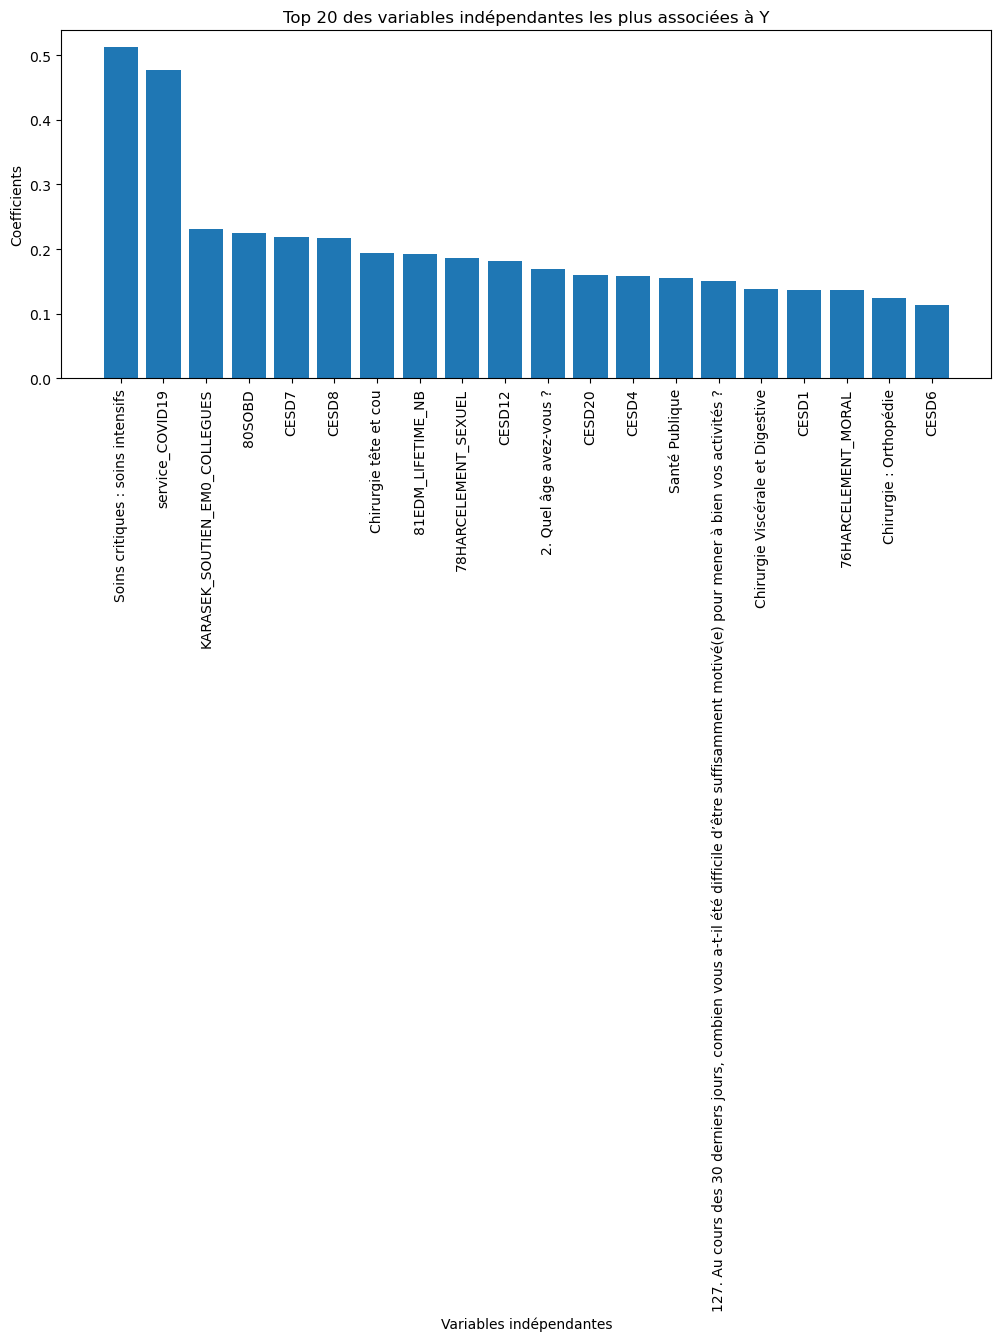

In [83]:
# Tracer un diagramme en barres pour les 20 variables indépendantes les plus associées à Y
plt.figure(figsize=(12, 6))
plt.bar(sorted_coef.head(20).index, sorted_coef.head(20))
plt.title("Top 20 des variables indépendantes les plus associées à Y")
plt.xlabel("Variables indépendantes")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.show()

# Construction du modèle SVM (Support Vector Machine) : modèle linéaire

Le modèle SVM (Support Vector Machine) est un modèle d'apprentissage supervisé utilisé pour la classification et la régression. L'objectif de ce modèle est de trouver une frontière de décision qui sépare les données en deux classes distinctes avec la plus grande marge possible.

Pour ce faire, le modèle SVM utilise un hyperplan qui sépare les données en deux classes en maximisant la marge, c'est-à-dire la distance entre l'hyperplan et les points les plus proches de chaque classe. Les points les plus proches de l'hyperplan sont appelés vecteurs de support, d'où le nom de Support Vector Machine.

Le modèle SVM peut être utilisé pour la classification binaire et multiclasse, ainsi que pour la régression. Pour la classification binaire, le modèle SVM linéaire utilise une fonction d'activation de type "step function" tandis que les modèles SVM non linéaires utilisent des fonctions d'activation non linéaires telles que le noyau gaussien.

Le modèle SVM a de bonnes performances dans la classification de données linéairement et non linéairement séparables. Cependant, il peut être sensible aux données bruyantes et peut être coûteux en termes de temps de calcul pour de grandes quantités de données.

In [84]:
from sklearn.svm import SVC

classifier2 = SVC(kernel= 'linear', C=0.01, gamma='scale',random_state = 0, probability= True)
classifier2.fit(X_train, Y_train)

SVC(C=0.01, kernel='linear', probability=True, random_state=0)

### LES PARAMETRES

#Noyau (kernel) : le noyau est une fonction mathématique qui transforme les données d'entrée (vecteurs) dans un espace de dimension supérieure, où elles sont plus facilement séparables. Les noyaux les plus couramment utilisés sont le noyau linéaire (Linear kernel), le noyau RBF (Radial basis function kernel), le noyau polynomial (Polynomial kernel), et le noyau sigmoidal (Sigmoid kernel).

#C : C est un paramètre de régularisation qui contrôle la pénalité appliquée aux erreurs de classification. Un C faible permettra une certaine classification incorrecte en échange d'une surface de décision plus simple, tandis qu'un C élevé donnera une surface de décision plus complexe, en essayant de classifier toutes les données correctement. C agit donc comme une mesure d'équilibre entre la simplicité de la surface de décision et la précision de classification.

#Gamma : Gamma est un paramètre qui définit la "distance" d'influence de chaque point d'entraînement dans la fonction de décision. Plus gamma est grand, plus la surface de décision sera "pointue" et plus chaque point d'entraînement aura une influence étendue. Un gamma plus faible aura l'effet inverse, conduisant à une surface de décision plus douce et plus régulière.

#Probability est un paramètre optionnel pour les modèles SVM de la librairie scikit-learn. Ce paramètre permet d'activer la sortie des probabilités des prédictions du modèle.

Par défaut, les modèles SVM de scikit-learn ne fournissent pas les probabilités des prédictions, mais plutôt une prédiction binaire (0 ou 1) pour chaque exemple. Si le paramètre probability est activé, le modèle SVM utilise une méthode de calibration pour estimer les probabilités des prédictions.

### Faire de nouvelles prédictions 

In [85]:
Y2_pred = classifier2.predict(X_test)
print(Y_test)
print(Y2_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 0 ... 0 1 1]


In [86]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [87]:
with np.printoptions(threshold=np.inf):
    print(Y2_pred)

[0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 

### MATRICE DE CONFUSION

In [88]:
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(Y_test, Y2_pred)
CM2

array([[656, 226],
       [275, 908]], dtype=int64)

<AxesSubplot:>

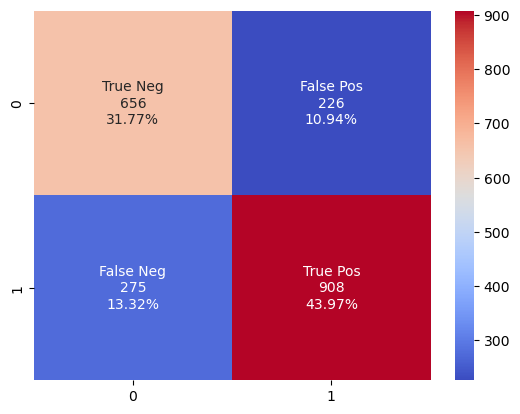

In [89]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM2.flatten()/np.sum(CM2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM2, annot=labels, fmt='', cmap='coolwarm')

In [90]:
print(Y_test.shape)
print(CM2)

(2065,)
[[656 226]
 [275 908]]


### INTERPRETATION

Le modèle de SVM a prèdit que sur les 2065 individus : 

1- 656 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 656, et y0 = 656

2- 908 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 908, et y1 =908

3- 226 ont le burn_out alors qu'ils ne l'ont pas  (FP) en clair ŷ1 = 226, et y0 = 226

4- 275 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 275 , et y1 = 275

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [91]:
Accuracy_Rate2 = accuracy_score(Y_test, Y2_pred)
Error_rate2 = 1 - Accuracy_Rate2
F1_score_svm = f1_score(Y_test, Y2_pred)

print("Accuracy rate: ", Accuracy_Rate2)
print("Error rate: ",Error_rate2)
print("F1_score: ",F1_score_svm)

Accuracy rate:  0.7573849878934624
Error rate:  0.24261501210653758
F1_score:  0.7837721191195511


# Courbe roc 

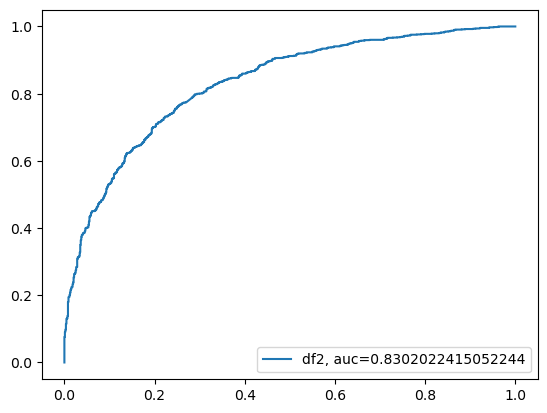

In [92]:
y_pred_proba2 = classifier2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(Y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### INTERPRETATION :
Le score AUC pour ce cas est de 0,83. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [93]:
from sklearn.feature_selection import SelectFromModel

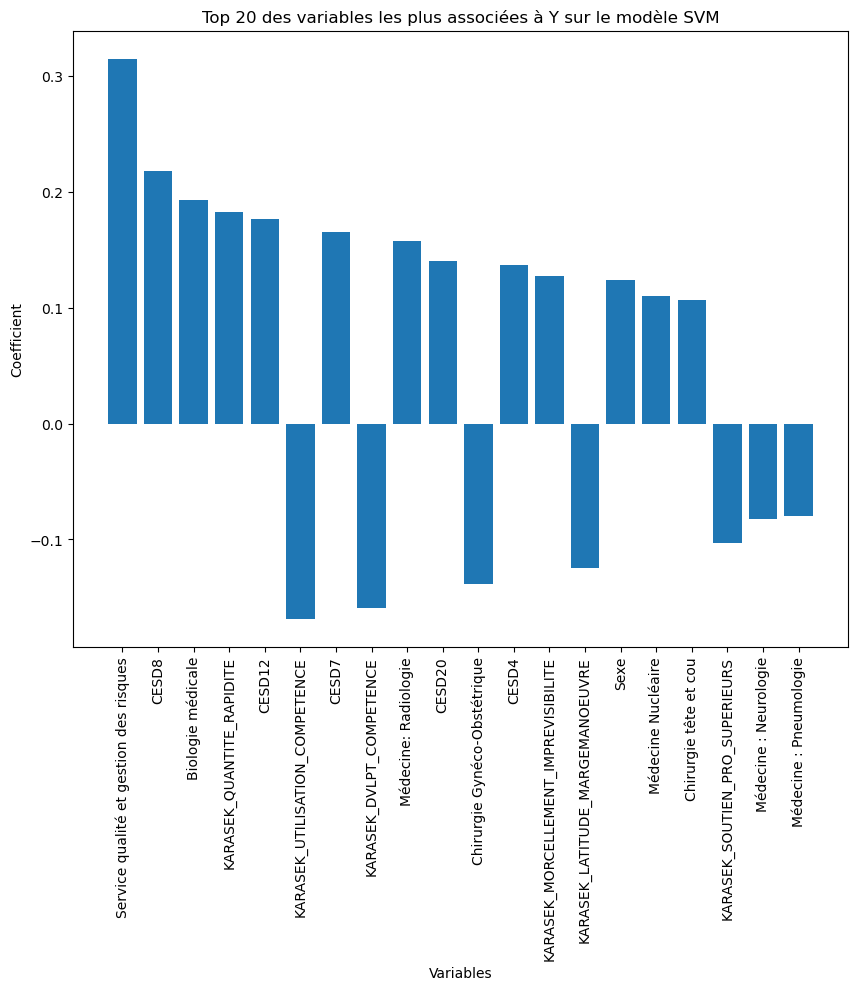

In [94]:
# Sélectionner les variables les plus importantes
sfm = SelectFromModel(classifier2, threshold=-np.inf, max_features=20)
X_new = sfm.fit_transform(X, Y)

# Récupérer les noms des variables sélectionnées
feature_names = X.columns[sfm.get_support()]

# Calculer les coefficients associés à chaque variable
coef = pd.DataFrame(classifier2.coef_.T, index=X.columns, columns=['Coefficient'])
coef['abs'] = coef['Coefficient'].abs()
top_coef = coef.loc[feature_names].sort_values('abs', ascending=False)

# Tracer le graphique de barres pour les 20 variables les plus importantes
plt.figure(figsize=(10, 8))
plt.bar(top_coef.index[:20], top_coef['Coefficient'][:20])
plt.title("Top 20 des variables les plus associées à Y sur le modèle SVM")
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Coefficient")
plt.show()

# Construction du modèle Kernel_SVM (Support Vector Machine) : modèle non linéaire

Le modèle Kernel SVM (Support Vector Machine) est une extension du modèle SVM classique qui permet de résoudre des problèmes de classification non linéaires en utilisant des fonctions de noyau (kernel: linéaire, polynomial, gaussien, ou sigmoide) pour transformer les données d'entrée dans un espace de dimension supérieure. Cette transformation permet de trouver une frontière de décision non linéaire entre les classes.

Le modèle Kernel SVM fonctionne en identifiant les vecteurs de support qui sont les points de données les plus proches de la frontière de décision et qui contribuent le plus à la définition de celle-ci. Le choix du noyau (kernel) est crucial dans ce modèle car il détermine la nature de la transformation des données dans l'espace de dimension supérieure.

Les avantages du modèle Kernel SVM sont sa capacité à gérer des données non linéaires, sa robustesse aux données bruyantes et son efficacité pour les problèmes à haute dimension. Cependant, il peut être sensible au choix du noyau et peut être plus lent que d'autres modèles pour de grandes quantités de données.

In [95]:
from sklearn.svm import SVC
classifier3 = SVC(kernel= 'rbf', C=0.1, gamma=0.1, random_state = 0,probability=True)
classifier3.fit(X_train, Y_train)

SVC(C=0.1, gamma=0.1, probability=True, random_state=0)

### Faire de nouvelles prédictions 

In [96]:
Y3_pred = classifier3.predict(X_test)
print(Y_test)
print(Y3_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 0 ... 1 1 1]


In [97]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [98]:
with np.printoptions(threshold=np.inf):
    print(Y3_pred)

[0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

### MATRICE DE CONFUSION

In [99]:
from sklearn.metrics import confusion_matrix
CM3 = confusion_matrix(Y_test, Y3_pred)
CM3

array([[ 222,  660],
       [  66, 1117]], dtype=int64)

<AxesSubplot:>

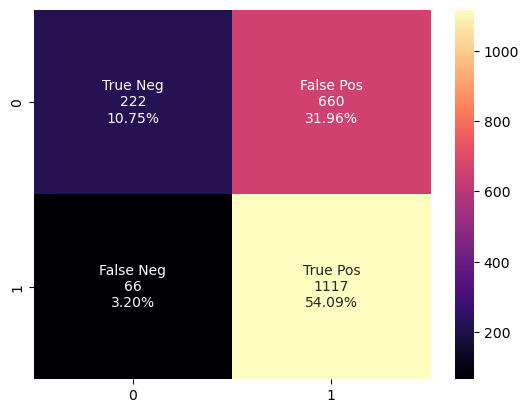

In [100]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM3.flatten()/np.sum(CM3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM3, annot=labels, fmt='', cmap='magma')

In [101]:
print(Y_test.shape)
print(CM3)

(2065,)
[[ 222  660]
 [  66 1117]]


### INTERPRETATION

Le modèle de kernel_SVM a prèdit que sur les 2065 individus : 

1- 222 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 222 , et y0 = 222 

2- 1117 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 1117, et y1 = 1117

3- 660 ont le burn_out alors qu'ils ne l'ont pas  (FP) en clair ŷ1 = 660, et y0 = 660

4- 66 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 66 , et y1 = 66

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [102]:
Accuracy_Rate3 = accuracy_score(Y_test, Y3_pred)
Error_rate3 = 1 - Accuracy_Rate3
F1_score_ksvm = f1_score(Y_test, Y3_pred)

print("Accuracy rate: ", Accuracy_Rate3)
print("Error rate: ",Error_rate3)
print("F1_score: ",F1_score_ksvm)

Accuracy rate:  0.6484261501210654
Error rate:  0.3515738498789346
F1_score:  0.7547297297297297


# Courbe roc 

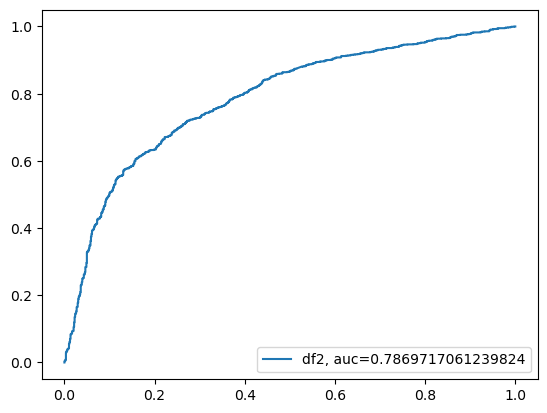

In [103]:
y_pred_proba3 = classifier3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba3)
auc = metrics.roc_auc_score(Y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,78. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.

# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [104]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

In [ ]:
# Calcul de l'importance de permutation des fonctionnalités
result = permutation_importance(classifier3, X_test, Y_test, n_repeats=10, random_state=42)

# Récupération des indices des fonctionnalités triées par importance décroissante
sorted_idx = np.argsort(result.importances_mean)[::-1][:10]

# Affichage du graphique des importances des fonctionnalités
plt.bar(range(10), result.importances_mean[sorted_idx])
plt.xticks(range(10), X.columns[sorted_idx])
plt.xlabel('Fonctionnalités')
plt.ylabel('Importance')
plt.show()

# Construction du modèle Naive Bayes ou le classificateur bayésien naïf : modèle non linéaire

Le modèle Naive Bayes est un algorithme de classification probabiliste basé sur le théorème de Bayes (Le théorème de Bayes est un concept fondamental en probabilité et en statistiques. Il stipule que la probabilité conditionnelle d'un événement A sachant qu'un événement B s'est produit est égale à la probabilité de B sachant que A s'est produit multipliée par la probabilité de A, le tout divisé par la probabilité de B.).

Il est appelé "naif" car il suppose que toutes les caractéristiques (features) sont indépendantes les unes des autres, ce qui simplifie grandement les calculs. Ce modèle est particulièrement adapté pour des problèmes de classification avec des données textuelles telles que la classification de mails en spam ou non-spam.

Le modèle Naive Bayes calcule la probabilité qu'une instance appartienne à chaque classe en utilisant la distribution de probabilité de chaque caractéristique pour chaque classe. La classe avec la probabilité la plus élevée est choisie comme prédiction.

Il existe plusieurs variantes de Naive Bayes, dont les plus courantes sont : Bernoulli Naive Bayes, Multinomial Naive Bayes et Gaussian Naive Bayes. Le choix du modèle dépend des types de données et du problème de classification à résoudre.

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
# Définition des probabilités a priori
priors = [0.4, 0.6]

In [108]:
# Créer un objet Gaussian Naive Bayes
classifier4 = GaussianNB(priors=priors, var_smoothing=1e-5)

# Entraîner le modèle sur l'ensemble d'apprentissage
classifier4.fit(X_train, Y_train)

GaussianNB(priors=[0.4, 0.6], var_smoothing=1e-05)

### LES PARAMETRES

#priors : Les probabilités a priori de chaque classe. Si aucune valeur n'est spécifiée, les probabilités a priori sont calculées à partir des données d'apprentissage.

#var_smoothing : Le coefficient de lissage utilisé pour estimer la variance de chaque caractéristique. Par défaut, var_smoothing=1e-9.

### Faire des prédictions sur l'ensemble de test

In [109]:
Y4_pred = classifier4.predict(X_test)
print(Y_test)
print(Y4_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 0 ... 0 1 1]


In [110]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [111]:
with np.printoptions(threshold=np.inf):
    print(Y4_pred)

[0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1
 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 1 1 1 1 0 1 0 

In [112]:
from sklearn.metrics import confusion_matrix
CM4 = confusion_matrix(Y_test, Y4_pred)
CM4

array([[685, 197],
       [468, 715]], dtype=int64)

<AxesSubplot:>

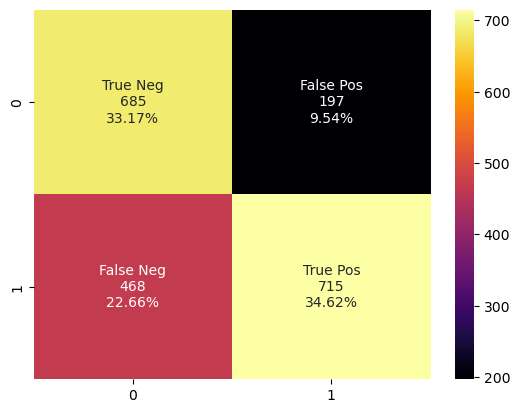

In [113]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM4.flatten()/np.sum(CM4)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM4, annot=labels, fmt='', cmap='inferno')

In [114]:
print(Y_test.shape)
print(CM4)

(2065,)
[[685 197]
 [468 715]]


### INTERPRETATION

Le modèle de Naives Bayes a prèdit que sur les 2065 individus :

1- 685 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 685, et y0 = 685

2- 715 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 715, et y1 = 715

3- 197 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 197, et y0 = 197

4- 468 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 468 , et y1 = 468

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [115]:
Accuracy_Rate4 = accuracy_score(Y_test, Y4_pred)
Error_rate4 = 1 - Accuracy_Rate4
F1_score_NB = f1_score(Y_test, Y4_pred)

print("Accuracy rate: ", Accuracy_Rate4)
print("Error rate: ",Error_rate4)
print("F1_score: ",F1_score_NB)

Accuracy rate:  0.6779661016949152
Error rate:  0.3220338983050848
F1_score:  0.6825775656324582


# Courbe roc 

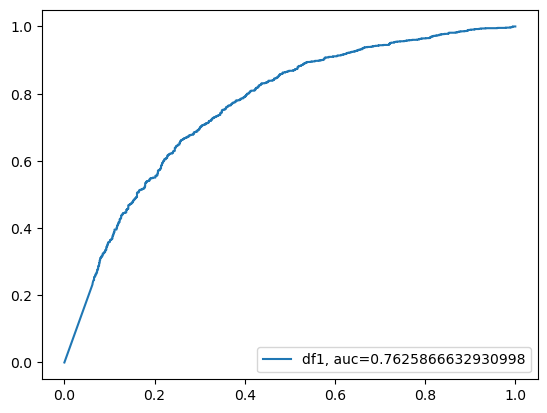

In [116]:
y_pred_proba4 = classifier4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba4)
auc = metrics.roc_auc_score(Y_test, y_pred_proba4)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,76. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [117]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [118]:
# Calcul de l'importance des variables avec la mutual information
mi = mutual_info_classif(X_train, Y_train, discrete_features=True)

# Création d'une DataFrame pour stocker les résultats
mi_df = pd.DataFrame({"feature": X_df.columns, "importance": mi})

# Tri des variables selon leur importance
mi_df = mi_df.sort_values("importance", ascending=False)

# Sélection des 20 variables les plus importantes
top_20 = mi_df.head(20)
top_20 

,feature,importance
100,METS_MIN_SEMAINE,0.193345
80,KARASEK_LATITUDE_MARGEMANOEUVRE,0.140387
106,CESD7,0.083051
118,CESD8,0.082634
116,CESD20,0.081785
105,CESD6,0.076283
119,CESD12,0.072899
127,"127. Au cours des 30 derniers jours, combien v...",0.072538
120,CESD16,0.062591
117,CESD4,0.062444


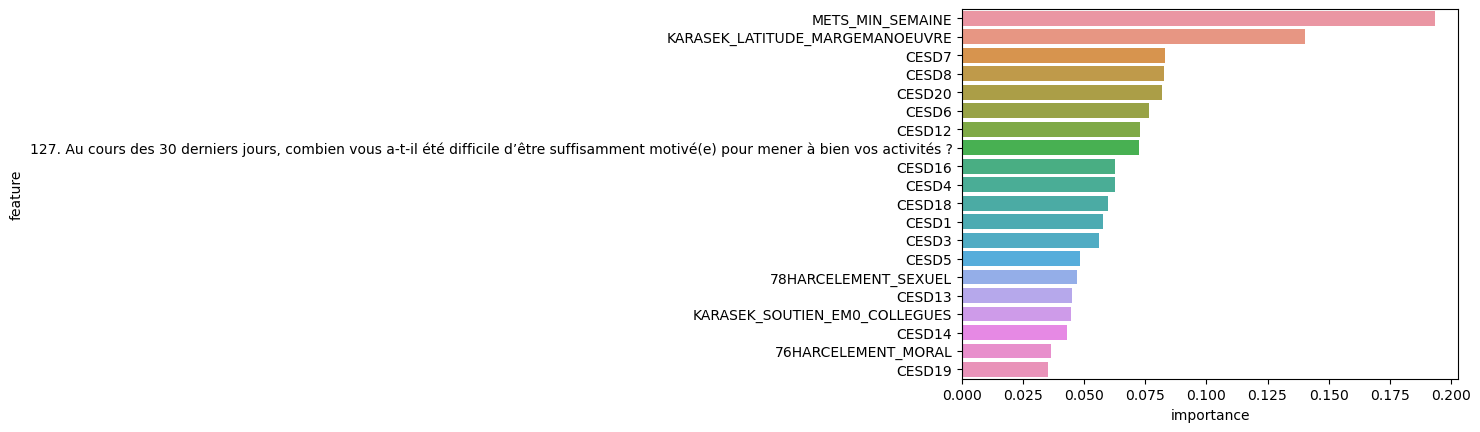

In [119]:
# Plotting du résultat sous forme de graphique à barres
sns.barplot(x="importance", y="feature", data=top_20)
plt.show()

# Construction du modèle Decision Tree : modèle non linéaire

Le modèle d'arbre de décision est un algorithme de Machine Learning qui utilise une approche en "si/alors" pour la prise de décision. Il s'agit d'un modèle de classification et de régression supervisée qui divise l'espace de la variable d'entrée en sous-régions, en utilisant des seuils pour chaque caractéristique, afin de prédire la valeur de la variable de sortie.

L'arbre de décision est construit en commençant par la racine, qui représente l'ensemble complet des données d'entrée, et en utilisant une fonction de mesure de l'impureté (comme l'entropie ou le gain d'information) pour déterminer la caractéristique la plus discriminante pour la séparation des données. Les sous-régions sont alors créées en fonction de cette caractéristique, et l'algorithme est répété pour chaque sous-région jusqu'à ce qu'une condition d'arrêt soit atteinte (par exemple, une taille de sous-région minimale).

L'arbre de décision peut être utilisé pour la classification et la régression, et peut gérer des données continues et catégorielles. Il peut également gérer des données manquantes et des valeurs aberrantes. Les avantages de l'arbre de décision sont qu'il est facile à interpréter et à visualiser, et qu'il peut être utilisé pour prendre des décisions dans des domaines variés.

Cependant, l'arbre de décision peut être sensible aux données d'entrée et aux conditions d'arrêt, ce qui peut entraîner un surajustement ou un sous-ajustement du modèle. Des techniques comme la taille minimale de la feuille, la coupe minimale de la variance, la réduction du nombre de caractéristiques et l'élagage peuvent être utilisées pour améliorer la performance de l'arbre de décision.

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
# Créer un objet ClassifierTree
classifier5 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Entraîner le modèle sur l'ensemble d'apprentissage
classifier5.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

### LES PARAMETRES

Voici la signification de chaque paramètre :

#criterion : c'est la fonction utilisée pour mesurer la qualité de la division des noeuds de l'arbre. Les valeurs possibles sont "gini" pour l'indice de Gini et "entropy" pour l'entropie de Shannon. Par défaut, le critère est "gini".

#max_depth : c'est la profondeur maximale de l'arbre. Plus la profondeur est élevée, plus l'arbre sera complexe et plus il y a de risque de surapprentissage (overfitting). Par défaut, la profondeur maximale est None, ce qui signifie que l'arbre sera étendu jusqu'à ce que toutes les feuilles soient pures ou que toutes les feuilles aient un nombre de points de données inférieur à la valeur minimale de min_samples_split.

#min_samples_split : c'est le nombre minimum d'échantillons requis pour diviser un noeud. Si le nombre de points de données dans un noeud est inférieur à cette valeur, la division sera arrêtée. Par défaut, min_samples_split est 2.

#min_samples_leaf : c'est le nombre minimum d'échantillons requis pour être dans une feuille. Si le nombre de points de données dans une feuille est inférieur à cette valeur, la division ne sera pas effectuée et la feuille sera considérée comme une feuille de décision. Par défaut, min_samples_leaf est 1.

### Faire des prédictions sur l'ensemble de test

In [122]:
Y5_pred = classifier5.predict(X_test)
print(Y_test)
print(Y5_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 0 ... 0 1 1]


In [123]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [124]:
with np.printoptions(threshold=np.inf):
    print(Y5_pred)

[0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0
 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 0 

In [125]:
from sklearn.metrics import confusion_matrix
CM5 = confusion_matrix(Y_test, Y5_pred)
CM5

array([[634, 248],
       [360, 823]], dtype=int64)

<AxesSubplot:>

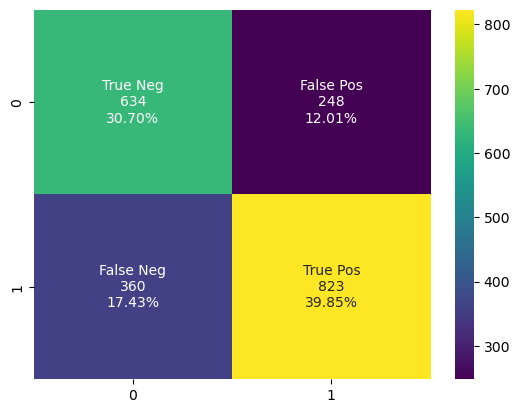

In [126]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM5.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM5.flatten()/np.sum(CM5)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM5, annot=labels, fmt='', cmap='viridis')

In [127]:
print(Y_test.shape)
print(CM5)

(2065,)
[[634 248]
 [360 823]]


## INTERPRETATION 

Le modèle de Decision Tree a prèdit que sur les 2065 individus :

1- 634 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 634, et y0 = 634

2- 823 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 823, et y1 = 823

3- 248 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 248, et y0 = 248

4- 360 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 360 , et y1 = 360

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [128]:
Accuracy_Rate5 = accuracy_score(Y_test, Y5_pred)
Error_rate5 = 1 - Accuracy_Rate5
F1_score_DT = f1_score(Y_test, Y5_pred)

print("Accuracy rate: ", Accuracy_Rate5)
print("Error rate: ",Error_rate5)
print("F1_score: ",F1_score_DT)

Accuracy rate:  0.7055690072639225
Error rate:  0.29443099273607753
F1_score:  0.7302573203194321


# Courbe roc 

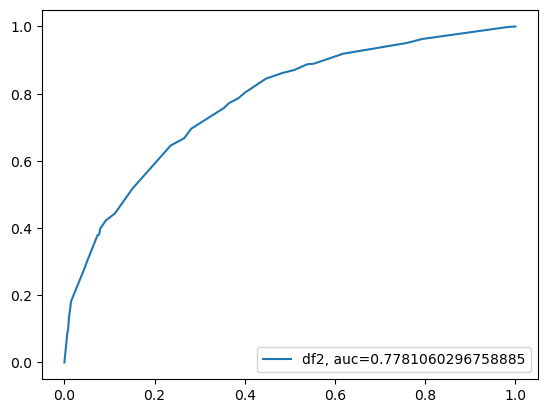

In [129]:
y_pred_proba5 = classifier5.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba5)
auc = metrics.roc_auc_score(Y_test, y_pred_proba5)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,77. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [130]:
# Récupération des importances des variables
importances = classifier5.feature_importances_

# Création d'un DataFrame pour visualiser les importances des variables
feature_importances = pd.DataFrame({'feature': X_df.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

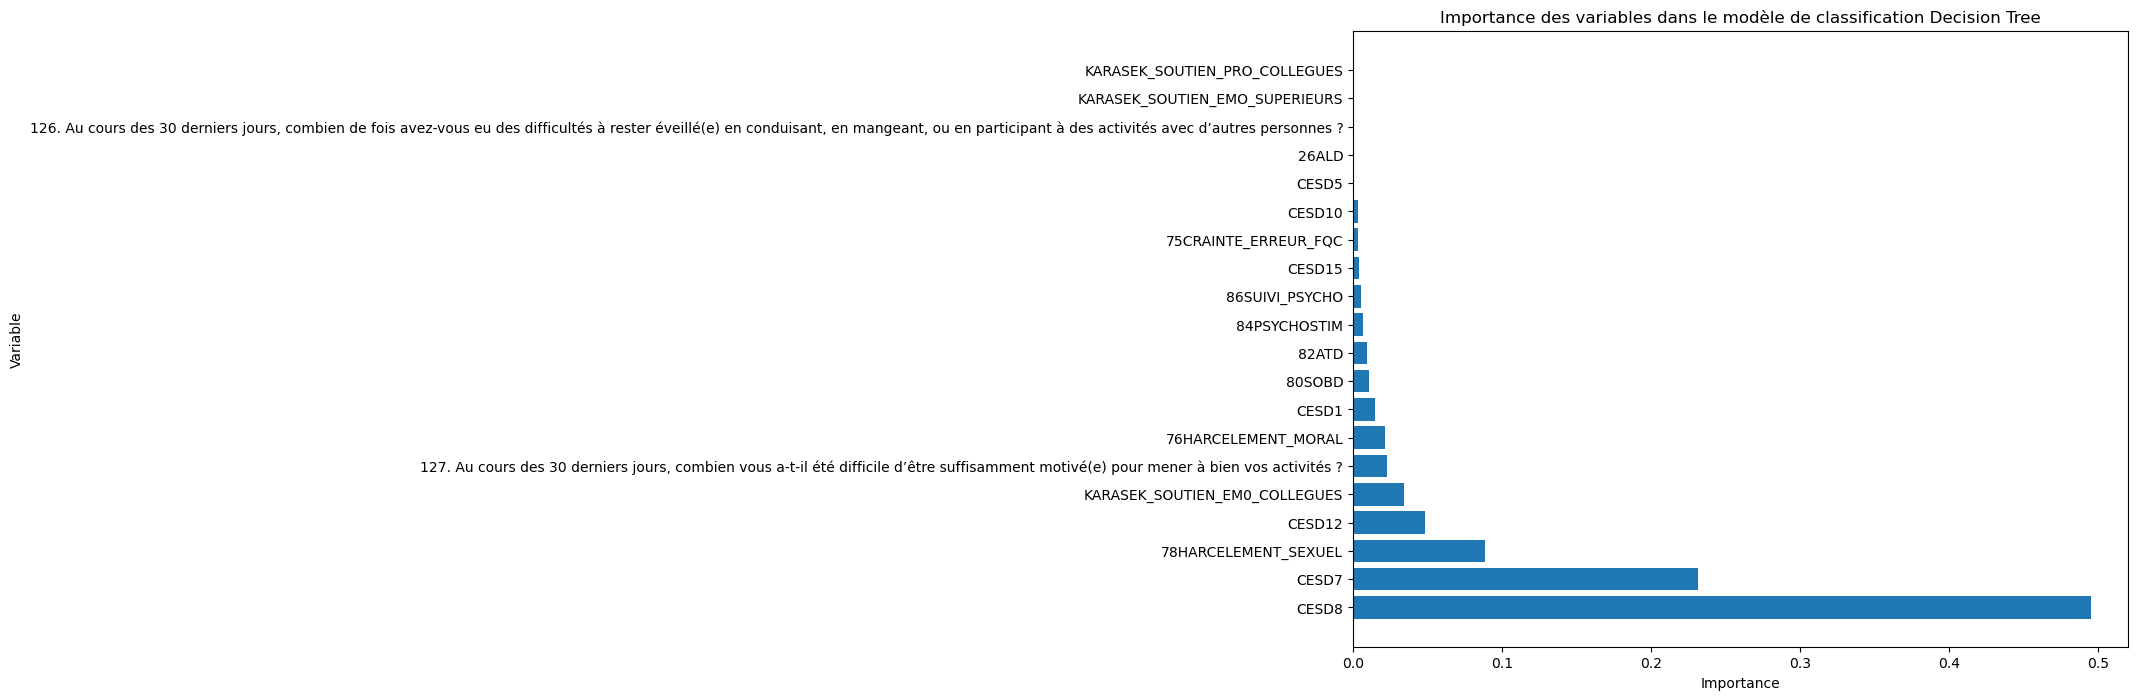

In [131]:
# Plot des 20 variables les plus importantes
top_features = feature_importances.head(20)
plt.figure(figsize=(10,8))
plt.barh(top_features['feature'], top_features['importance'])
plt.title("Importance des variables dans le modèle de classification Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()

# Construction du modèle Random Forest : modèle non linéaire

Le modèle de Random Forest est un algorithme d'apprentissage supervisé en Machine Learning qui utilise une combinaison d'arbres de décision pour créer un modèle prédictif.

L'idée est de construire plusieurs arbres de décision, en utilisant différents échantillons d'entraînement et des sous-ensembles de fonctionnalités, afin de créer un ensemble de modèles qui travaillent ensemble pour donner une prédiction précise. Les prédictions de chaque arbre sont ensuite agrégées pour donner une prédiction finale.

Le modèle de Random Forest peut être utilisé pour la classification et la régression, et est particulièrement utile pour les ensembles de données avec de nombreuses caractéristiques, y compris des variables continues et catégorielles. Il est également robuste aux valeurs manquantes et aux données bruyantes.

Les avantages du modèle de Random Forest sont sa précision de prédiction, sa capacité à traiter les données manquantes et bruyantes, et sa capacité à gérer de grandes quantités de données. Cependant, il peut être plus lent à entraîner que d'autres modèles et peut être plus difficile à interpréter en raison de la complexité de l'ensemble d'arbres de décision.

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Initialisation du modèle de classification Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
rf_classifier.fit(X_train, Y_train)


RandomForestClassifier(max_depth=3, random_state=42)

### LES PARAMETRES 

Les paramètres utilisés dans ce modèle Random Forest sont :

#n_estimators : le nombre d'arbres de décision à construire. Plus ce nombre est grand, plus le modèle sera robuste, mais cela peut augmenter le temps d'entraînement. La valeur par défaut est 100.

#max_depth : la profondeur maximale de chaque arbre de décision. Une valeur plus grande peut permettre au modèle de mieux s'adapter aux données d'entraînement, mais peut également entraîner un surajustement. La valeur par défaut est None, ce qui signifie que les arbres sont développés jusqu'à ce que toutes les feuilles soient pures ou que le nombre minimal d'échantillons requis pour diviser une feuille soit atteint.

#min_samples_split : le nombre minimum d'échantillons requis pour diviser un nœud interne. Si le nombre d'échantillons dans un nœud est inférieur à ce paramètre, le nœud ne sera pas divisé. Une valeur plus grande peut empêcher le modèle de surajuster, mais peut également réduire les performances. La valeur par défaut est 2.

#min_samples_leaf : le nombre minimum d'échantillons requis pour être dans une feuille. Si une feuille contient moins d'échantillons que ce paramètre, la division du nœud est annulée. Comme min_samples_split, une valeur plus grande peut empêcher le modèle de surajuster, mais peut également réduire les performances. La valeur par défaut est 1.

#random_state : permet de fixer la graine aléatoire pour la reproductibilité des résultats. La valeur par défaut est None, ce qui signifie que chaque exécution peut donner des résultats différents.


### Faire des prédictions sur l'ensemble de test

In [134]:
Y6_pred = rf_classifier.predict(X_test)
print(Y_test)
print(Y6_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 0 ... 0 1 1]


In [135]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [136]:
with np.printoptions(threshold=np.inf):
    print(Y6_pred)

[0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 

In [137]:
from sklearn.metrics import confusion_matrix
CM6 = confusion_matrix(Y_test, Y6_pred)
CM6

array([[580, 302],
       [234, 949]], dtype=int64)

<AxesSubplot:>

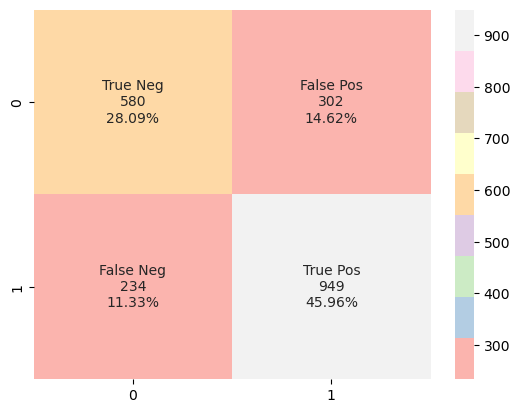

In [138]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM6.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM6.flatten()/np.sum(CM6)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM6, annot=labels, fmt='', cmap='Pastel1')

In [139]:
print(Y_test.shape)
print(CM6)

(2065,)
[[580 302]
 [234 949]]


## INTERPRETATION 

Le modèle de Decision Tree a prèdit que sur les 2065 individus :

1- 580 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 580, et y0 = 580

2- 949 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 949, et y1 = 949

3- 302 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 302, et y0 = 302

4- 234 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 234 , et y1 = 234

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [140]:
Accuracy_Rate6 = accuracy_score(Y_test, Y6_pred)
Error_rate6 = 1 - Accuracy_Rate6
F1_score_RD = f1_score(Y_test, Y6_pred)

print("Accuracy rate: ", Accuracy_Rate6)
print("Error rate: ",Error_rate6)
print("F1_score: ",F1_score_DT)

Accuracy rate:  0.7404358353510896
Error rate:  0.2595641646489104
F1_score:  0.7302573203194321


# Courbe roc 

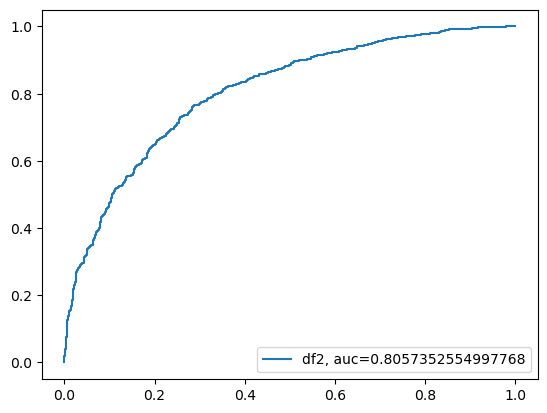

In [141]:
y_pred_proba6 = rf_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba6)
auc = metrics.roc_auc_score(Y_test, y_pred_proba6)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,82. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [142]:
# Récupérer l'importance des variables
importances = rf_classifier.feature_importances_

# Créer un DataFrame pour les importances
df_importances = pd.DataFrame({'feature': X_df.columns, 'importance': importances})

# Trier les variables en fonction de leur importance
df_importances_sorted = df_importances.sort_values('importance', ascending=False).head(20)

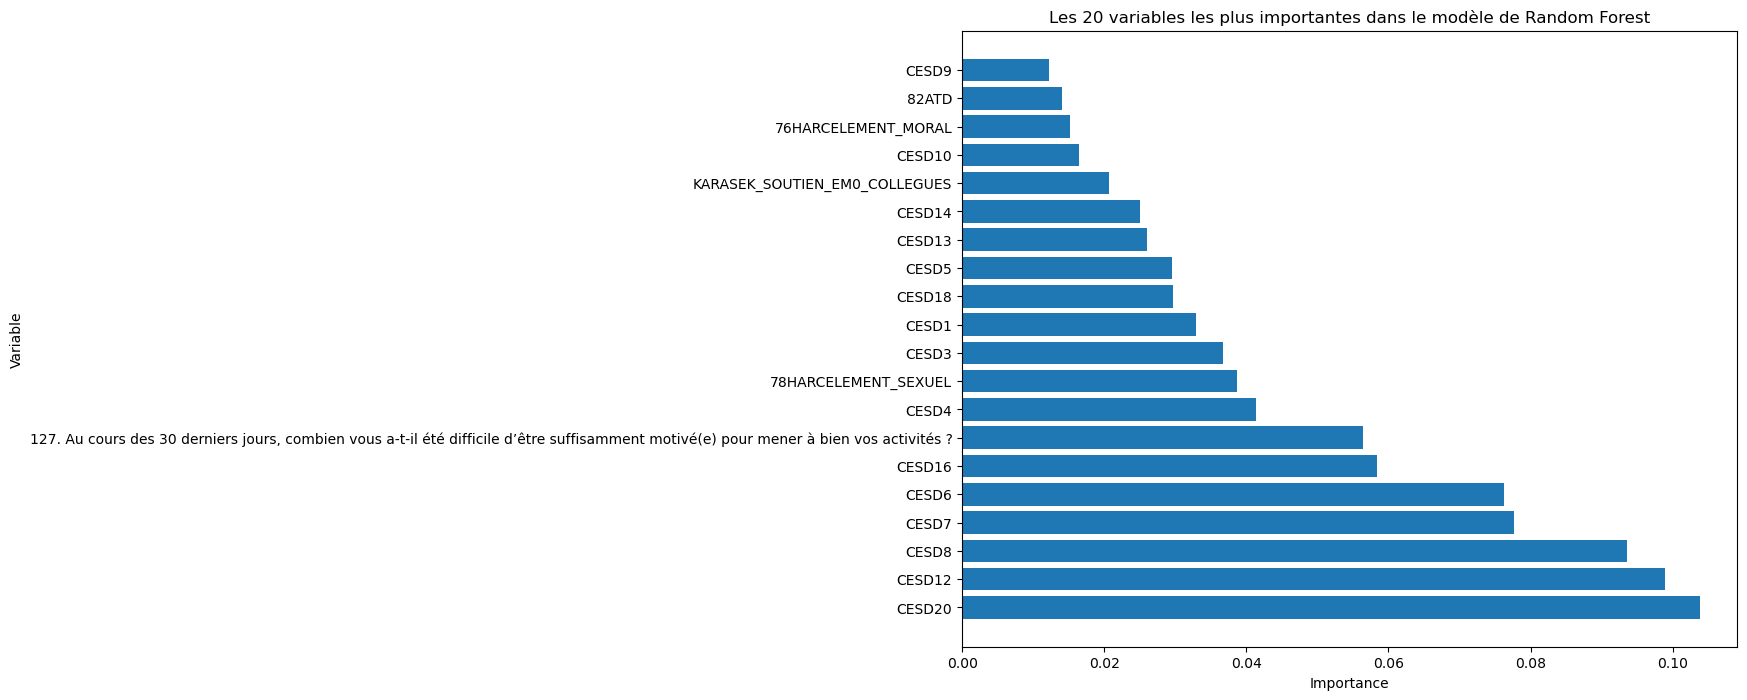

In [143]:
# Plot des variables importantes
plt.figure(figsize=(10, 8))
plt.barh(df_importances_sorted['feature'], df_importances_sorted['importance'])
plt.title('Les 20 variables les plus importantes dans le modèle de Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Construction du modèle K-Nearest Neighbors ou KNN : modèle non linéaire

Le modèle K-Nearest Neighbors (KNN) est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression. L'idée de base derrière KNN est de trouver les k instances les plus proches dans l'ensemble de données d'apprentissage et de prendre la décision basée sur la majorité des étiquettes des instances voisines.

Le modèle KNN utilise une mesure de distance, telle que la distance euclidienne, pour calculer la distance entre les instances dans l'espace des caractéristiques. Les k instances les plus proches sont déterminées en fonction de la distance. Pour la classification, la classe la plus fréquente parmi les k voisins est choisie comme la classe de la nouvelle instance. Pour la régression, la valeur de la variable de sortie est calculée en moyennant les valeurs des k voisins les plus proches.

Le modèle KNN est simple et facile à mettre en œuvre, mais il peut être sensible à la présence de valeurs aberrantes et peut être lent à prédire les étiquettes pour de grands ensembles de données. Le choix de la valeur de k peut également avoir un impact important sur les performances du modèle.

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
# Initialisation du modèle de classification KNN

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Entraînement du modèle sur l'ensemble d'entraînement
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

### LES PARAMETRES

Explications des paramètres :

#n_neighbors : le nombre de voisins à prendre en compte pour la classification. Ce paramètre doit être choisi en fonction de la taille du dataset et du nombre de classes. Une valeur trop petite peut conduire à du surapprentissage, tandis qu'une valeur trop grande peut conduire à du sous-apprentissage. Il est courant de tester plusieurs valeurs pour trouver la meilleure.

#metric : la distance à utiliser pour mesurer la similitude entre deux instances. Les distances les plus courantes sont l'euclidienne (par défaut), la Manhattan, la Minkowski et la distance de Chebyshev. Le choix de la distance dépend du type de données que vous utilisez. Par exemple, pour des données continues, l'euclidienne est souvent un bon choix, tandis que pour des données catégorielles, la distance de Hamming peut être plus appropriée.

### Faire des prédictions sur l'ensemble de test

In [146]:
Y7_pred = knn_classifier.predict(X_test)
print(Y_test)
print(Y7_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 0 ... 1 1 1]


In [147]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [148]:
with np.printoptions(threshold=np.inf):
    print(Y7_pred)

[0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 

In [149]:
from sklearn.metrics import confusion_matrix
CM7 = confusion_matrix(Y_test, Y7_pred)
CM7

array([[627, 255],
       [366, 817]], dtype=int64)

<AxesSubplot:>

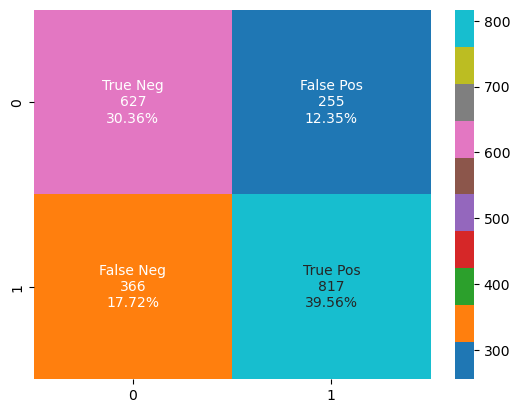

In [150]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM7.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM7.flatten()/np.sum(CM7)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM7, annot=labels, fmt='', cmap='tab10')

In [151]:
print(Y_test.shape)
print(CM7)

(2065,)
[[627 255]
 [366 817]]


## INTERPRETATION

Le modèle KNN Neighbors a prèdit que sur les 2065 individus :

1- 627 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 627, et y0 = 627

2- 817 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 817, et y1 = 817

3- 255 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 255, et y0 = 255

4- 366 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 366, et y1 = 366

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [152]:
Accuracy_Rate7 = accuracy_score(Y_test, Y7_pred)
Error_rate7 = 1 - Accuracy_Rate7
F1_score_KNN = f1_score(Y_test, Y7_pred)

print("Accuracy rate: ", Accuracy_Rate7)
print("Error rate: ",Error_rate7)
print("F1_score: ",F1_score_KNN)

Accuracy rate:  0.699273607748184
Error rate:  0.30072639225181597
F1_score:  0.7246119733924613


# Courbe roc 


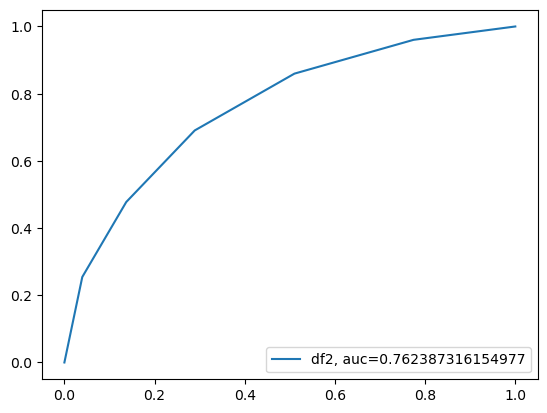

In [153]:
y_pred_proba7 = knn_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba7)
auc = metrics.roc_auc_score(Y_test, y_pred_proba7)
plt.plot(fpr,tpr,label="df2, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,72. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [154]:
from sklearn.inspection import permutation_importance

In [ ]:
# Effectuer une analyse de permutation pour obtenir les importances des variables
result = permutation_importance(knn_classifier, X_test, Y_test, n_repeats=10, random_state=42)

# Créer un DataFrame avec les noms de variables et leurs importances
importances_df = pd.DataFrame({'feature': X_df.columns, 'importance': result.importances_mean})

# Trier les variables par ordre d'importance décroissante
importances_df = importances_df.sort_values('importance', ascending=False).reset_index(drop=True)



In [ ]:
sns.barplot(x='importance', y='feature', data=importances_df.head(20))
plt.title('Importance des variables - KNN')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Construction du modèle Gradient Boosting : modèle non linéaire

Le Gradient Boosting est une technique d'apprentissage automatique utilisée pour résoudre des problèmes de régression et de classification. C'est une méthode d'ensemble qui combine plusieurs modèles de prédiction plus faibles (souvent des arbres de décision) pour former un modèle plus fort.

Le Gradient Boosting fonctionne en ajustant successivement les modèles pour minimiser les erreurs de prédiction du modèle précédent. À chaque étape, le Gradient Boosting calcule les résidus (différences entre les valeurs réelles et prédites) du modèle précédent, puis ajuste un nouveau modèle pour prédire ces résidus. Le résultat final est une combinaison pondérée de tous les modèles.

Le Gradient Boosting est efficace pour résoudre les problèmes de classification et de régression non linéaires, et est largement utilisé dans de nombreux domaines tels que la finance, la biologie et l'analyse de données. Cependant, il peut être assez sensible aux hyperparamètres et nécessite une optimisation minutieuse pour atteindre les meilleures performances.

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
# Initialisation du modèle de classification Gradient Boosting
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, min_samples_leaf=1, max_features=None,
                                           max_depth=3, min_samples_split=2, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
gb_classifier.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=42)

#### LES PARAMETRES 

#n_estimators : C'est le nombre d'arbres de décision dans le modèle. Plus il y a d'arbres, plus le modèle peut apprendre de relations complexes entre les variables d'entrée et les sorties souhaitées. Cependant, cela peut également rendre le modèle plus complexe et augmenter le risque de surapprentissage. Il est donc important de trouver un équilibre entre le nombre d'estimateurs et les performances de prédiction.

#learning_rate : Il s'agit du taux d'apprentissage, qui détermine la vitesse à laquelle le modèle apprend des erreurs de prédiction. Un taux d'apprentissage plus élevé signifie que le modèle s'adapte plus rapidement aux erreurs, mais cela peut également augmenter le risque de surapprentissage. Un taux d'apprentissage plus faible signifie que le modèle prend plus de temps pour s'adapter aux erreurs, mais cela peut également aider à prévenir le surapprentissage.

#max_depth : C'est la profondeur maximale de chaque arbre de décision. Une profondeur plus grande signifie que chaque arbre peut apprendre des relations plus complexes entre les variables d'entrée et les sorties souhaitées, mais cela peut également rendre le modèle plus complexe et augmenter le risque de surapprentissage. Il est donc important de trouver un équilibre entre la profondeur maximale et les performances de prédiction.

#min_samples_split : C'est le nombre minimal d'échantillons requis pour diviser un nœud. Si le nombre d'échantillons dans un nœud est inférieur à cette valeur, le nœud ne sera pas divisé. Cela peut aider à prévenir le surapprentissage en limitant le nombre de nœuds créés et en favorisant les divisions qui ont une contribution significative à la prédiction.

#min_samples_leaf : C'est le nombre minimal d'échantillons requis pour être une feuille. Si le nombre d'échantillons dans une feuille est inférieur à cette valeur, la feuille sera fusionnée avec une autre feuille. Cela peut aider à prévenir le surapprentissage en limitant le nombre de feuilles créées et en favorisant les feuilles qui ont une contribution significative à la prédiction.

#max_features : C'est le nombre maximal de fonctionnalités à considérer lors de la recherche de la meilleure division. Si None, alors toutes les fonctionnalités sont considérées, sinon, une valeur entière doit être passée. Limiter le nombre de fonctionnalités peut aider à réduire la complexité du modèle et à prévenir le surapprentissage.

### Faire des prédictions sur l'ensemble de test

In [157]:
Y8_pred = gb_classifier.predict(X_test)
print(Y_test)
print(Y8_pred)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64
[0 1 1 ... 0 1 1]


In [158]:
from sklearn.metrics import accuracy_score

In [159]:
# Calcul de la précision du modèle
accuracy = accuracy_score(Y_test, Y8_pred)
print("Précision : ", accuracy)

Précision :  0.7559322033898305


In [160]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

3209    0
3840    0
6683    0
2030    0
9279    1
       ..
9368    0
5141    0
9804    1
2853    1
1884    1
Name: Y, Length: 2065, dtype: int64


In [161]:
with np.printoptions(threshold=np.inf):
    print(Y8_pred)

[0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1
 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 

In [162]:
from sklearn.metrics import confusion_matrix
CM8 = confusion_matrix(Y_test, Y8_pred)
CM8

array([[633, 249],
       [255, 928]], dtype=int64)

<AxesSubplot:>

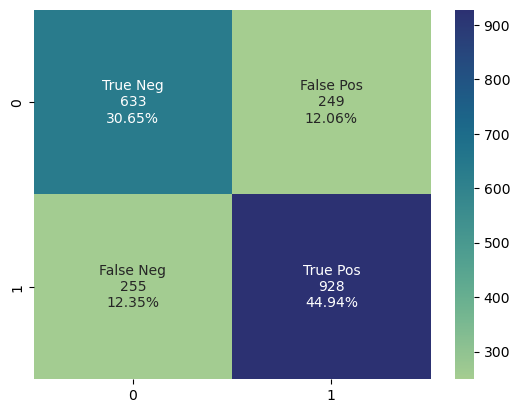

In [163]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM8.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM8.flatten()/np.sum(CM7)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM8, annot=labels, fmt='', cmap='crest')

In [164]:
print(Y_test.shape)
print(CM8)

(2065,)
[[633 249]
 [255 928]]


## INTERPRETATION 

Le modèle Gradient Boosting a prèdit que sur les 2065 individus :

1- 633 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 633, et y0 = 633

2- 928 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 928, et y1 = 928

3- 249 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 249, et y0 = 249

4- 255 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 255 , et y1 = 255

### ACCURACY RATE, ERROR RATE & F1-SCORE

In [165]:
Accuracy_Rate8 = accuracy_score(Y_test, Y8_pred)
Error_rate8 = 1 - Accuracy_Rate8
F1_score_GB = f1_score(Y_test, Y8_pred)

print("Accuracy rate: ", Accuracy_Rate8)
print("Error rate: ",Error_rate8)
print("F1_score: ",F1_score_GB)

Accuracy rate:  0.7559322033898305
Error rate:  0.24406779661016953
F1_score:  0.7864406779661016


# Courbe roc 

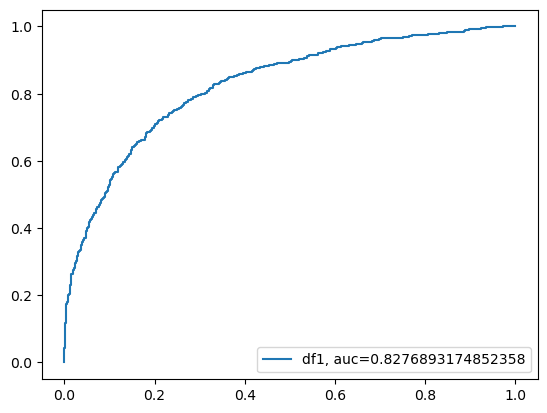

In [166]:
y_pred_proba8 = gb_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba8)
auc = metrics.roc_auc_score(Y_test, y_pred_proba8)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,82. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.

# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [167]:
# Récupération des importances des variables
importances = gb_classifier.feature_importances_

# Création d'un DataFrame avec les noms de variables et leurs importances
importances_df = pd.DataFrame({'feature': X_df.columns, 'importance': importances})

# Tri des variables en fonction de leur importance
importances_df_sorted = importances_df.sort_values('importance', ascending=False)

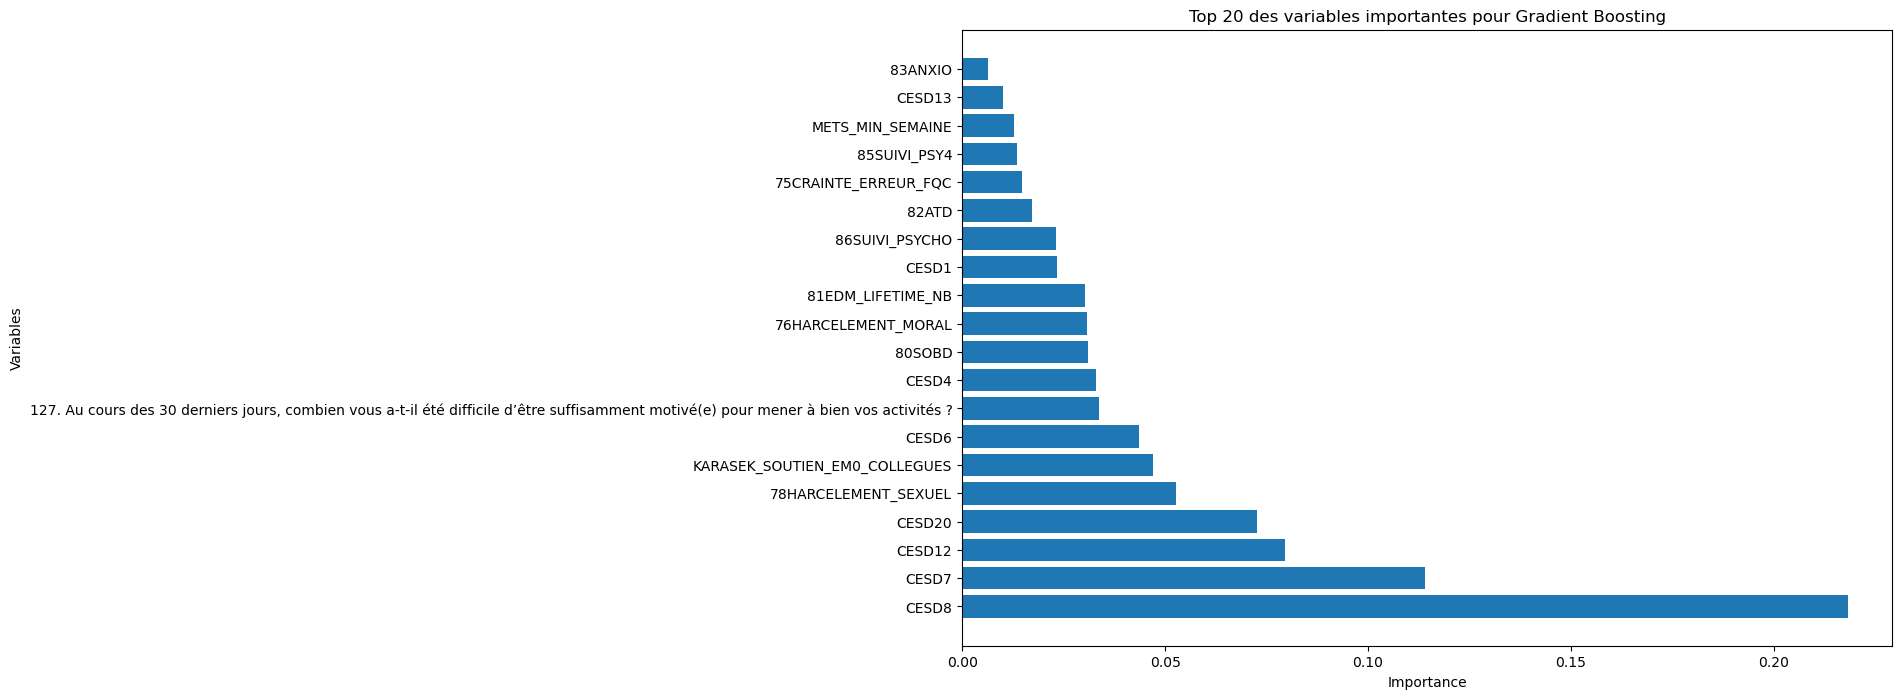

In [168]:
# Plot des 20 premières variables et de leurs importances associées
plt.figure(figsize=(12,8))
plt.title('Top 20 des variables importantes pour Gradient Boosting')
plt.barh(importances_df_sorted['feature'][:20], importances_df_sorted['importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

# DEEP LEARNING

### Artificial Neural Network (ANN)

Le réseau de neurones artificiels (ANN) est un modèle d'apprentissage en profondeur (Deep Learning) qui vise à imiter le fonctionnement du cerveau humain pour résoudre des problèmes complexes tels que la reconnaissance de motifs, la classification et la prédiction. Le modèle est constitué de plusieurs couches de neurones artificiels, chacune avec une fonction d'activation qui permet au modèle de capturer des relations non linéaires dans les données.

L'ANN est généralement entraîné à l'aide de la méthode de la rétropropagation (backpropagation), qui ajuste les poids de chaque neurone pour minimiser la fonction de coût. Le modèle peut être utilisé pour la classification et la régression, et peut gérer des données structurées et non structurées telles que des images, des séquences de texte et des séries chronologiques.

Les avantages de l'ANN comprennent sa capacité à apprendre à partir de grandes quantités de données et à capturer des relations complexes dans les données. Cependant, l'entraînement du modèle peut être coûteux en termes de temps de calcul et de ressources de calcul nécessaires, et il peut être difficile d'interpréter les résultats du modèle.

In [169]:
import keras
from keras.models import Sequential # C'est le module qui va nous permettre d'initialiser le reseau de neuronne 
from keras.layers import Dense # C'est le module qui nous permet de créer les couches des réseaux de neuronne 
from keras.layers import Dropout

In [170]:
# Initialisation du réseau de neurones
classifier = Sequential()

# Ajout de la couche d'entrée et de la première couche cachée
classifier.add(Dense(units=65, activation='relu', input_dim=128,))
classifier.add(Dropout(0.2))

# Ajout de la deuxième couche cachée
classifier.add(Dense(units=32, activation='relu'))
classifier.add(Dropout(0.2))

# Ajout de la troisième couche cachée
classifier.add(Dense(units=16, activation='relu'))
classifier.add(Dropout(0.2))

# Ajout de la couche de sortie
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilation du réseau de neurones
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du réseau de neurones
classifier.fit(X_train, Y_train, batch_size=10, epochs=100)


Epoch 1/100
826/826 [==============================] - 4s 3ms/step - loss: 0.5611 - accuracy: 0.7146
Epoch 2/100
826/826 [==============================] - 3s 3ms/step - loss: 0.5210 - accuracy: 0.7442
Epoch 3/100
826/826 [==============================] - 2s 3ms/step - loss: 0.5137 - accuracy: 0.7505
Epoch 4/100
826/826 [==============================] - 2s 3ms/step - loss: 0.5049 - accuracy: 0.7540
Epoch 5/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4932 - accuracy: 0.7632
Epoch 6/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4869 - accuracy: 0.7665
Epoch 7/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4809 - accuracy: 0.7740
Epoch 8/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4681 - accuracy: 0.7775
Epoch 9/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4566 - accuracy: 0.7886
Epoch 10/100
826/826 [==============================] - 3s 3ms/step - loss: 0.4488 - accura

In [171]:
# Évaluer le modèle sur les données de test
loss, accuracy = classifier.evaluate(X_test, Y_test)
print("Perte (loss) sur les données de test: ", loss)
print("Accuracy sur les données de test: ", accuracy)

65/65 [==============================] - 1s 3ms/step - loss: 1.1991 - accuracy: 0.7128
Perte (loss) sur les données de test:  1.1990954875946045
Accuracy sur les données de test:  0.7128329277038574


In [172]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluation de l'accuracy rate
Y_pred_9 = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_9.round())
print("Accuracy rate:", accuracy)

# Evaluation de l'error rate
error_rate = 1 - accuracy
print("Error rate:", error_rate)

# Evaluation du F1-score
f1score = f1_score(Y_test, Y_pred_9.round())
print("F1-score:", f1score)

65/65 [==============================] - 0s 2ms/step
Accuracy rate: 0.7128329297820823
Error rate: 0.28716707021791765
F1-score: 0.7462558836114677


Text(0, 0.5, 'Accuracy')

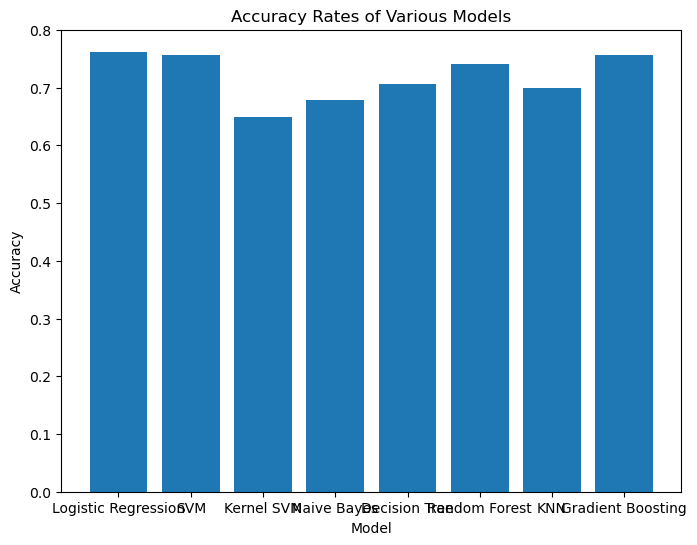

In [177]:
 # Créer des listes des métriques pour chaque modèle
accuracy_rates = [Accuracy_Rate,Accuracy_Rate2,Accuracy_Rate3, 
                  Accuracy_Rate4, Accuracy_Rate5, Accuracy_Rate6,Accuracy_Rate7, Accuracy_Rate8]
error_rates = [1 - a for a in accuracy_rates]
f1_scores = [F1_score_logreg, F1_score_svm,F1_score_ksvm, 
             F1_score_NB, F1_score_DT, F1_score_RD, F1_score_KNN, F1_score_GB]

# Créer une liste des noms de modèle pour étiqueter le graphique
model_names = ['Logistic Regression', 'SVM', 'Kernel SVM', 'Naive Bayes', 
               'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting']

# Créer un graphique à barres pour les accuracy rates
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_rates)
plt.title('Accuracy Rates of Various Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')